# CSMODEL Machine Project: 

This Jupyter Notebook includes the following contents:
    
    0.  2023 Global Youtube Statistics Dataset
    1.  Description of the Dataset
    2.  Data Cleaning Process of the Dataset
    3.  Exploratory Data Analysis 
    4.  Proposed Research Question
    5.  
    6. 
    7. 
    8. 

### GARYNATION  (S13)
    1.  Bien Aaron Miranda 
    2.  Luis Miguel Rana
    3.  Karl Andre Aquino
    4.  Dominic Luis Baccay

# Phase 1

### Python Libraries

Import numpy and pandas.

pandas is a software library for Python which provides data structures and data analysis tools.

In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
from scipy import stats

## The Dataset
This dataset, which includes well-known YouTube personalities, offers a compelling opportunity to analyze and glean invaluable insights from the influential figures within the platform. It contains comprehensive details on subscriber counts, video views, posting frequency, country of origin, income, and other relevant information about top creators. This treasure trove of data is indispensable for up-and-coming content creators, data aficionados, and anyone intrigued by the dynamic landscape of online content creation.

As stated by the dataset owner, dataset was painstakingly and diligently compiled from an array of highly regarded and credible sources, meticulously curating its contents to guarantee the utmost accuracy and unwavering reliability of the information it encapsulates, thereby instilling confidence in the veracity of the presented data.





In [459]:
#encoding came from the discussion so that it is readable
youtube_df = pd.read_csv("Global YouTube Statistics.csv", encoding='iso-8859-1')

If you view the `.csv` file in Excel, you can see that our dataset contains about 995 **observations** (rows) across 28 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`rank`**: Position of the YouTube channel based on the number of subscribers
- **`Youtuber`**: Name of the YouTube channel
- **`subscribers`**: Number of subscribers to the channel
- **`video views`**: Overall count views to the channel
- **`category`**: Category or niche of the channel
- **`Title`**: Title
- **`uploads`**: Total number of videos uploaded on the channel
- **`Country`**: Country where the YouTube channel originates
- **`Abbreviation`**: Abbreviation of the country
- **`channel_type`**: Type of the YouTube channel (e.g., individual, brand)
- **`video_views_rank`**: Ranking of the channel based on total video views
- **`country_rank`**: Ranking of the channel based on the number of subscribers within its country
- **`channel_type_rank`**: Ranking of the channel based on its type (individual or brand)
- **`video_views_for_the_last_30_days`**: Total video views in the last 30 days
- **`lowest_monthly_earnings`**: Lowest estimated monthly earnings from the channel \$
- **`highest_monthly_earnings`**: Highest estimated monthly earnings from the channel \$
- **`lowest_yearly_earnings`**: Lowest estimated yearly earnings from the channel \$
- **`highest_yearly_earnings`**: Highest estimated yearly earnings from the channel $
- **`subscribers_for_last_30_days`**: Number of new subscribers gained in the last 30 days
- **`created_year`**: Year when the YouTube channel was created
- **`created_month`**: Month when the YouTube channel was created
- **`created_date`**: Exact date of the YouTube channel's creation
- **`Gross tertiary education enrollment (\%)`**: Percentage of the population enrolled in tertiary education in the country %
- **`Population`**: Total population of the country
- **`Unemployment rate`**: Unemployment rate in the country %
- **`Urban_population`**: Percentage of the population living in urban areas %
- **`Latitude`**: Latitude coordinate of the country's location
- **`Longitude`**: Longitude coordinate of the country's location




## Reading the Dataset

Our first step is to load the dataset using pandas. This will load the dataset into a pandas DataFrame. To load the dataset, we use the read_csv function. Note that you may need to change the path depending on the location of the file in your machine.

Will also tackle about what can be seen in the Dataset as a DataFrame

In [460]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### Examining the observations within the Dataset

    
To gain a better understanding of the observations within the dataset, it's essential to examine their appearance or visual representation. This can provide valuable insights and help you make informed decisions based on the data.

In [461]:
youtube_df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


# Cleaning the Dataset

    This section of the Jupyter Notebook contains the overall process and variables affected during the data cleaning of our dataset.

### Before Cleaning:
    Number of Observations: 995
    Number of Columns: 28
    Data types: float64(18), int64(3), object(7)

### Initial Observations: 
-   There are special characters in the 'Youtuber' column.
-   There are missing/null values in the dataset.
-   Some variables are similar, therefore, unnecessary.
-   Some data types are inappropriate for their respective variables.



#### Variables to be Observed:
We will be dropping all columns/variables except the following.
- **`Youtuber`**: Name of the YouTube channel
- **`subscribers`**: Number of subscribers to the channel
- **`video views`**: Overall count views to the channel
- **`category`**: Category or niche of the channel
- **`uploads`**: Total number of videos uploaded on the channel
- **`Country`**: Country where the YouTube channel originates
- **`channel_type`**: Type of the YouTube channel (e.g., individual, brand)
- **`lowest_monthly_earnings`**: Lowest estimated monthly earnings from the channel \$
- **`highest_monthly_earnings`**: Highest estimated monthly earnings from the channel \$
- **`lowest_yearly_earnings`**: Lowest estimated yearly earnings from the channel \$
- **`highest_yearly_earnings`**: Highest estimated yearly earnings from the channel $
- **`created_year`**: Year when the YouTube channel was created
- **`Population`**: Total population of the country

In [462]:
# Declare the variables that will be used
columns_to_keep = ['Youtuber', 'subscribers', 'video views', 'uploads', 'category', 'channel_type', 'Country', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'created_year', 'Population']
columns_to_drop = list(set(youtube_df.columns) - set(columns_to_keep))

# Drop unused columns (variables)
youtube_df.drop(columns_to_drop, axis=1, inplace=True)

youtube_df

,Youtuber,subscribers,video views,category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245000000,2.280000e+11,Music,20082,India,Music,564600.0,9000000.00,6800000.00,1.084000e+08,2006.0,1.366418e+09
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,0.0,0.05,0.04,5.800000e-01,2006.0,3.282395e+08
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,337000.0,5400000.00,4000000.00,6.470000e+07,2012.0,3.282395e+08
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,493800.0,7900000.00,5900000.00,9.480000e+07,2006.0,3.282395e+08
4,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,455900.0,7300000.00,5500000.00,8.750000e+07,2006.0,1.366418e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,Brazil,Entertainment,138100.0,2200000.00,1700000.00,2.650000e+07,2017.0,2.125594e+08
991,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,Games,16200.0,258900.00,194200.00,3.100000e+06,2018.0,1.366418e+09
992,Panda,12300000,2.214684e+09,NaN,2452,United Kingdom,Games,17.0,268.00,201.00,3.200000e+03,2006.0,6.683440e+07
993,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,Games,968.0,15500.00,11600.00,1.858000e+05,2012.0,1.028545e+07


### The "Youtuber" variable

- **`Youtuber`**: Name of the YouTube channel<br>

We will explore the **`Youtuber`** column and check if it needs any cleaning or preprocessing.

We want to check if there are any observations that have null **`Youtuber`** values, if any, we will be excluding these observations from the list.


In [463]:
# Check for null values
column_name = "Youtuber"
nullyoutuber_count = youtube_df["Youtuber"].isnull().sum()
print(f"Number of unique values in '{column_name}': {nullyoutuber_count}")


Number of unique values in 'Youtuber': 0


We want to check if there are any duplicate **`Youtuber`** values, if any, the row will be removed.
     

In [464]:
# Check for duplicates
unique_count = youtube_df[column_name].nunique()
observation_count = youtube_df[column_name].count()

print(f"Number of observations in '{column_name}': {observation_count}")
print(f"Number of unique values in '{column_name}': {unique_count}")

Number of observations in 'Youtuber': 995
Number of unique values in 'Youtuber': 995


Since there are special characters present within the dataset, we will replace them with underscores "_" instead for readability.

In [465]:
# Define an array of special characters to replace
chars_to_replace = ['ï', '¿', '½', 'ý']

# Replace the characters with underscores
for char in chars_to_replace:
    youtube_df['Youtuber'] = youtube_df['Youtuber'].str.replace(char, '_', regex=False)

youtube_df

,Youtuber,subscribers,video views,category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245000000,2.280000e+11,Music,20082,India,Music,564600.0,9000000.00,6800000.00,1.084000e+08,2006.0,1.366418e+09
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,0.0,0.05,0.04,5.800000e-01,2006.0,3.282395e+08
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,337000.0,5400000.00,4000000.00,6.470000e+07,2012.0,3.282395e+08
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,493800.0,7900000.00,5900000.00,9.480000e+07,2006.0,3.282395e+08
4,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,455900.0,7300000.00,5500000.00,8.750000e+07,2006.0,1.366418e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por A__,12300000,9.029610e+09,Sports,1200,Brazil,Entertainment,138100.0,2200000.00,1700000.00,2.650000e+07,2017.0,2.125594e+08
991,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,Games,16200.0,258900.00,194200.00,3.100000e+06,2018.0,1.366418e+09
992,Panda,12300000,2.214684e+09,NaN,2452,United Kingdom,Games,17.0,268.00,201.00,3.200000e+03,2006.0,6.683440e+07
993,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,Games,968.0,15500.00,11600.00,1.858000e+05,2012.0,1.028545e+07


### The "Subscribers" variable

- **`subscribers`**: Number of subscribers to the channel<br>

We will explore the **`subscribers`** column and check if it needs any cleaning or preprocessing.

We want to check if there are any observations with null **`subscribers`** values.

In [466]:
# Display the counts
null_subscriber_count = youtube_df['subscribers'].eq(0).sum()
print(f'Number of null values in "subscribers": {null_subscriber_count}')

Number of null values in "subscribers": 0


Since there are none, we now want to convert the data type from **`int64`** to **`float64`** for scaling. <br>
We will scale the values to millions, so we will need to convert the data type to one that can recognize decimals. <br>
We are scaling the values for easier interpretation and visualization.

In [467]:
# Convert to float64 data type
youtube_df['subscribers'] = youtube_df['subscribers'].astype('float64')
# Convert the "subscribers" column to values in millions
youtube_df['subscribers'] = youtube_df['subscribers'] / 1000000
# Rename the "subscribers" column to indicate values are in millions
youtube_df.rename(columns={'subscribers': 'subscribers (millions)'}, inplace=True)
youtube_df

,Youtuber,subscribers (millions),video views,category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,2.280000e+11,Music,20082,India,Music,564600.0,9000000.00,6800000.00,1.084000e+08,2006.0,1.366418e+09
1,YouTube Movies,170.0,0.000000e+00,Film & Animation,1,United States,Games,0.0,0.05,0.04,5.800000e-01,2006.0,3.282395e+08
2,MrBeast,166.0,2.836884e+10,Entertainment,741,United States,Entertainment,337000.0,5400000.00,4000000.00,6.470000e+07,2012.0,3.282395e+08
3,Cocomelon - Nursery Rhymes,162.0,1.640000e+11,Education,966,United States,Education,493800.0,7900000.00,5900000.00,9.480000e+07,2006.0,3.282395e+08
4,SET India,159.0,1.480000e+11,Shows,116536,India,Entertainment,455900.0,7300000.00,5500000.00,8.750000e+07,2006.0,1.366418e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por A__,12.3,9.029610e+09,Sports,1200,Brazil,Entertainment,138100.0,2200000.00,1700000.00,2.650000e+07,2017.0,2.125594e+08
991,Free Fire India Official,12.3,1.674410e+09,People & Blogs,1500,India,Games,16200.0,258900.00,194200.00,3.100000e+06,2018.0,1.366418e+09
992,Panda,12.3,2.214684e+09,NaN,2452,United Kingdom,Games,17.0,268.00,201.00,3.200000e+03,2006.0,6.683440e+07
993,RobTopGames,12.3,3.741235e+08,Gaming,39,Sweden,Games,968.0,15500.00,11600.00,1.858000e+05,2012.0,1.028545e+07


We also renamed the column from **`"subscribers"`** to **`"subscribers (millions)"`**. 

### The "Video Views" and "Uploads" variables
- **`video views`**: Overall count views to the channel
- **`uploads`**: Total number of videos uploaded on the channel<br>

We will explore the **`video views`** and **`uploads`** columns and check if it needs any cleaning or preprocessing.

We want to check if there are any observations that have null or zero values in these columns.

In [468]:
# Check for null values in "video views"
nullviews_df = youtube_df[youtube_df['video views'] == 0]
nullviews_df

,Youtuber,subscribers (millions),video views,category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
1,YouTube Movies,170.0,0.0,Film & Animation,1,United States,Games,0.0,0.05,0.04,0.58,2006.0,328239523.0
5,Music,119.0,0.0,NaN,0,NaN,Music,0.0,0.00,0.00,0.00,2013.0,NaN
12,Gaming,93.6,0.0,NaN,0,NaN,Games,0.0,0.00,0.00,0.00,2013.0,NaN
18,Sports,75.0,0.0,NaN,3,United States,Entertainment,0.0,0.06,0.05,0.77,2006.0,328239523.0
102,News,36.3,0.0,NaN,0,NaN,NaN,0.0,0.00,0.00,0.00,2013.0,NaN
173,Popular on YouTube,29.3,0.0,NaN,3,NaN,Education,0.0,0.00,0.00,0.05,2017.0,NaN
360,Minecraft - Topic,20.9,0.0,NaN,0,NaN,Games,0.0,0.00,0.00,0.00,2013.0,NaN
592,Live,16.1,0.0,NaN,0,NaN,NaN,0.0,0.00,0.00,0.00,2015.0,NaN


In [469]:
# Check for null values in "uploads"
nulluploads_df = youtube_df[youtube_df['uploads'] == 0]
nulluploads_df.head(10)

,Youtuber,subscribers (millions),video views,category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
5,Music,119.0,0.000000e+00,NaN,0,NaN,Music,0.0,0.0,0.0,0.0,2013.0,NaN
12,Gaming,93.6,0.000000e+00,NaN,0,NaN,Games,0.0,0.0,0.0,0.0,2013.0,NaN
57,BRIGHT SIDE,44.5,1.070853e+10,Howto & Style,0,NaN,NaN,0.0,0.0,0.0,0.0,2005.0,NaN
73,Luisito Comunica,40.6,8.670474e+09,Comedy,0,Mexico,Comedy,0.0,0.0,0.0,0.0,2010.0,126014024.0
102,News,36.3,0.000000e+00,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0,2013.0,NaN
113,T-Series Apna Punjab,34.6,2.130632e+10,Music,0,NaN,News,0.0,0.0,0.0,0.0,2020.0,NaN
149,Luis Fonsi,31.4,1.517676e+10,Entertainment,0,NaN,NaN,0.0,0.0,0.0,0.0,2006.0,NaN
166,Frost Diamond,30.1,7.277494e+09,Gaming,0,NaN,NaN,0.0,0.0,0.0,0.0,2006.0,NaN
180,Aditya Music India,28.5,2.585799e+10,Music,0,NaN,Music,0.0,0.0,0.0,0.0,2010.0,NaN
190,Sandeep Maheshwari,27.8,2.303069e+09,People & Blogs,0,Singapore,NaN,0.0,0.0,0.0,0.0,2008.0,5703569.0


In [470]:
# Display the counts
null_views_count = youtube_df['video views'].eq(0).sum()
null_uploads_count = youtube_df['uploads'].eq(0).sum()
print(f'Number of null values in "video views": {null_views_count}')
print(f'Number of null values in "uploads": {null_uploads_count}')

Number of null values in "video views": 8
Number of null values in "uploads": 43


We want to scale the **`video views`** into millions for easier interpretation and visualization.

In [471]:
# Convert the "video views" column to values in millions
youtube_df['video views'] = youtube_df['video views'] / 1000000
# Rename the "subscribers" column to indicate values are in millions
youtube_df.rename(columns={'video views': 'video views (millions)'}, inplace=True)

In [472]:
youtube_df['uploads'] = youtube_df['uploads'].astype('float64')

We want to see if there are any correlations between the **`video views (millions)`** and **`uploads`** with their respective indexes.

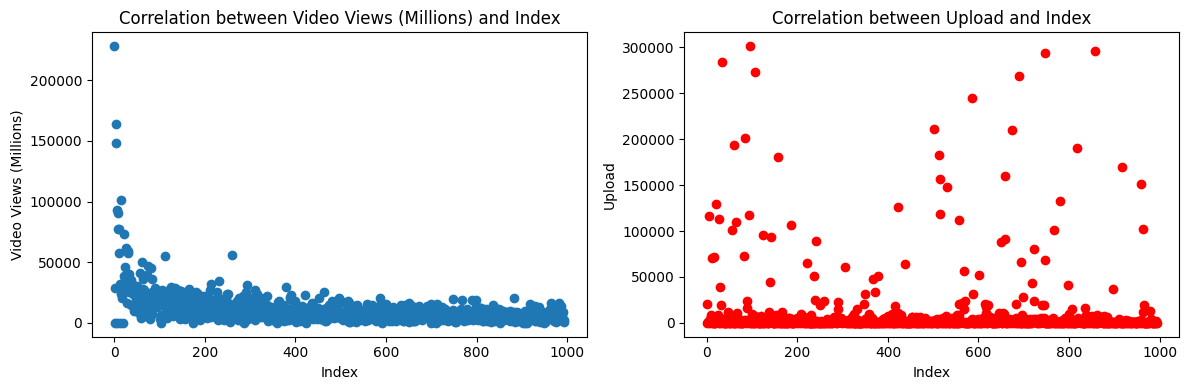

In [473]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot 'video views' (in millions) in the first subplot
axs[0].scatter(youtube_df.index, youtube_df['video views (millions)'])
axs[0].set_title('Correlation between Video Views (Millions) and Index')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Video Views (Millions)')

# axs[0].scatter(youtube_df.index, youtube_df['video views'])
# axs[0].set_title('Correlation between Video Views and Index')
# axs[0].set_xlabel('Index')
# axs[0].set_ylabel('Video Views')


# Plot 'upload' in the second subplot
axs[1].scatter(youtube_df.index, youtube_df['uploads'], color='red')
axs[1].set_title('Correlation between Upload and Index')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Upload')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the combined figure
plt.show()

Given the absence of significant correlations between **`video views`**, **`uploads`**, and their respective indexes, the decision has been made to remove the observations in question rather than replacing them with measures of central tendencies.

In [474]:
# Drop the rows where video views == 0
youtube_df = youtube_df[youtube_df["video views (millions)"] != 0]
# youtube_df = youtube_df[youtube_df["video views"] != 0]

# Drop the rows where uploads == 0
youtube_df = youtube_df[youtube_df["uploads"] != 0]
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,Music,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
2,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,Entertainment,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
3,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,Education,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
4,SET India,159.0,148000.000000,Shows,116536.0,India,Entertainment,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
6,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,Entertainment,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,Entertainment,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
991,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,Games,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
992,Panda,12.3,2214.684303,NaN,2452.0,United Kingdom,Games,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
993,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,Games,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


After removing the observations, we will be resetting the indexes ensure there are no gaps and the data remains continuous.

In [475]:
# Reset the index after dropping rows
youtube_df.reset_index(drop=True, inplace=True)
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,Music,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,Entertainment,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,Education,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
3,SET India,159.0,148000.000000,Shows,116536.0,India,Entertainment,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,Entertainment,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,Entertainment,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
945,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,Games,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
946,Panda,12.3,2214.684303,NaN,2452.0,United Kingdom,Games,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
947,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,Games,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


### The "Category" variable
- **`category`**: Category or niche of the channel<br>

We will explore the **`category`** column and check if it needs any cleaning or preprocessing.


We want to check if there are any observations that has null values for the **`category`** column.

In [476]:
# Check for null values in "category"
nullcategory_df = youtube_df[youtube_df["category"].isnull()]
nullcategory_df.head(10)

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
85,Vlad v_______,37.9,23510.152352,NaN,515.0,United States,Entertainment,61000.0,976400.0,732300.0,11700000.0,2018.0,328239523.0
124,BETER B______,32.7,19180.039918,NaN,2738.0,Turkey,Games,365900.0,5900000.0,4400000.0,70200000.0,2012.0,83429615.0
146,Diana and Roma ESP,30.7,12355.992466,NaN,578.0,United States,Entertainment,25700.0,412000.0,309000.0,4900000.0,2016.0,328239523.0
152,_______________ ______ __________________,30.4,17999.961915,NaN,532.0,United States,Entertainment,30700.0,491700.0,368800.0,5900000.0,2018.0,328239523.0
201,D Billions,26.2,31977.463002,NaN,775.0,United States,Entertainment,121800.0,1900000.0,1500000.0,23400000.0,2019.0,328239523.0
239,shfa show India,24.2,15724.160183,NaN,469.0,United Arab Emirates,People,37800.0,604800.0,453600.0,7300000.0,2019.0,9770529.0
240,Super JoJo - Nursery Rhymes & Kids Songs,24.1,329.774870,NaN,36.0,United States,Education,82100.0,1300000.0,985500.0,15800000.0,2019.0,328239523.0
245,Diana and Roma ARA,24.1,11041.261296,NaN,590.0,United States,Entertainment,16700.0,267500.0,200700.0,3200000.0,2019.0,328239523.0
294,Vlad and Niki Arabic,22.5,10613.701948,NaN,526.0,United States,Entertainment,16300.0,260300.0,195200.0,3100000.0,2018.0,328239523.0
301,Vlad and Niki ESP,22.0,8594.440895,NaN,515.0,United States,Entertainment,46000.0,735500.0,551600.0,8800000.0,2018.0,328239523.0


In [477]:
# Display the counts
null_category_count = youtube_df['category'].isnull().sum()
print(f'Number of null values in "category": {null_category_count}')

Number of null values in "category": 39


We will now check for possible values we can use to replace the null values within the **`category`** column based on the **`channel_type`** column.<br>
We are replacing the null values instead of removing them due to the presence of the **`channel_type`** variable which is similar in nature.

In [478]:
# Displaying the 'category' and 'channel_type' values for cleaning
column1 = 'category'
column2 = 'channel_type'

categoryandchannel_df = youtube_df.dropna(subset=[column1, column2])

unique_values_column1 = categoryandchannel_df[column1].unique().tolist()
unique_values_column2 = categoryandchannel_df[column2].unique().tolist()

df_unique_values_column1 = pd.DataFrame(unique_values_column1, columns=[column1])
df_unique_values_column2 = pd.DataFrame(unique_values_column2, columns=[column2])

# Concatenate DataFrames horizontally
result_df = pd.concat([df_unique_values_column1, df_unique_values_column2], axis=1)
result_df


,category,channel_type
0,Music,Music
1,Entertainment,Entertainment
2,Education,Education
3,Shows,People
4,People & Blogs,Sports
5,Gaming,Film
6,Sports,News
7,Film & Animation,Games
8,Howto & Style,Comedy
9,News & Politics,Howto


After going through the unique values, we have prepared the following values to be used as replacement based on the **`channel_type`**.
| channel_type | category |
| ----------- | ----------- |
| Games      | Gaming       |
| People   | People & Blogs        |
| Entertainment      | Entertainment       |
| Sports   | Sports        |
| Film      | Film & Animation       |
| Howto   | Howto & Style        |
| Education      | Education       |
| Tech   | Science & Technology        |
| Music   | Music    |

For the remaining rows with neither **`category`** nor **`channel_type`** values, they will be removed.

In [479]:
# Replace category null values with closest value in channel_type

# Use the .loc method to set the new value based on the condition (where 'category' is null)
youtube_df.loc[(youtube_df['channel_type'] == 'Games') & (youtube_df['category'].isnull()), 'category'] = 'Gaming'
youtube_df.loc[(youtube_df['channel_type'] == 'People') & (youtube_df['category'].isnull()), 'category'] = 'People & Blogs'
youtube_df.loc[(youtube_df['channel_type'] == 'Entertainment') & (youtube_df['category'].isnull()), 'category'] = 'Entertainment'
youtube_df.loc[(youtube_df['channel_type'] == 'Sports') & (youtube_df['category'].isnull()), 'category'] = 'Sports'
youtube_df.loc[(youtube_df['channel_type'] == 'Film') & (youtube_df['category'].isnull()), 'category'] = 'Film & Animation'
youtube_df.loc[(youtube_df['channel_type'] == 'Howto') & (youtube_df['category'].isnull()), 'category'] = 'Howto & Style'
youtube_df.loc[(youtube_df['channel_type'] == 'Education') & (youtube_df['category'].isnull()), 'category'] = 'Education'
youtube_df.loc[(youtube_df['channel_type'] == 'Tech') & (youtube_df['category'].isnull()), 'category'] = 'Science & Technology'
youtube_df.loc[(youtube_df['channel_type'] == 'Music') & (youtube_df['category'].isnull()), 'category'] = 'Music'

# Drop remaining rows with null values for 'category' column
youtube_df.dropna(subset=['category'], inplace=True)

# Display the modified DataFrame
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,channel_type,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,Music,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,Entertainment,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,Education,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
3,SET India,159.0,148000.000000,Shows,116536.0,India,Entertainment,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,Entertainment,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,Entertainment,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
945,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,Games,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
946,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,Games,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
947,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,Games,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


We will also drop the **`channel_type`** column since we will no longer be using it.

In [480]:
# Drop 'channel_type' column
youtube_df.drop(columns='channel_type', inplace=True)
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
944,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
945,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
946,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
947,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


After removing the observations, we will be resetting the indexes ensure there are no gaps and the data remains continuous.


In [481]:
# Reset the index after dropping rows
youtube_df.reset_index(drop=True, inplace=True)
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
943,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
944,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
945,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
946,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


### The "Country" variable
- **`Country`**: Country where the YouTube channel originates<br>

We will explore the **`Country`** column and check if it needs any cleaning or preprocessing.

We want to check if there are any observations that has null values for the **`Country`** column.

In [482]:
# Check for null values in Country
null_country_df = youtube_df[youtube_df["Country"].isnull()]
null_country_df.head(10)

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
11,Goldmines,86.9,24118.230580,Film & Animation,1.0,NaN,0.00,0.07,0.05,0.86,2006.0,NaN
34,LooLoo Kids - Nursery Rhymes and Children's Songs,54.0,32312.431239,Music,11.0,NaN,0.04,0.64,0.48,8.00,2016.0,NaN
44,Badabun,46.8,19398.045702,Entertainment,1.0,NaN,0.11,2.00,1.00,21.00,2007.0,NaN
47,Bad Bunny,46.1,30686.342319,Music,1.0,NaN,0.00,0.00,0.00,0.05,2005.0,NaN
57,HolaSoyGerman.,43.6,4831.311245,Entertainment,6.0,NaN,0.00,0.02,0.01,0.19,2016.0,NaN
68,elrubiusOMG,40.4,7410.536668,Gaming,703.0,NaN,1400.00,23100.00,17300.00,277100.00,2011.0,NaN
69,Toys and Colors,40.3,47005.053156,Entertainment,4.0,NaN,0.00,0.02,0.02,0.24,2018.0,NaN
71,LUCCAS NETO - LUCCAS TOON,39.4,22302.547082,People & Blogs,1.0,NaN,0.00,0.01,0.01,0.10,2021.0,NaN
94,PowerKids TV,36.5,18961.241905,Film & Animation,5621.0,NaN,79700.00,1300000.00,956100.00,15300000.00,2014.0,NaN
96,Ozuna,36.2,23355.801606,Music,196.0,NaN,42300.00,677000.00,507700.00,8100000.00,2016.0,NaN


In [483]:
# Check for null values in Country
null_country_count = youtube_df["Country"].isnull().sum()
print(f'Number of null values in "Country": {null_country_count}')

Number of null values in "Country": 94


There are 94 observations without a country, approximately 10% of the dataset has null **`Country`** values.<br>
Next, we will look for possible misrepresentations of the data.

In [484]:
# Get the unique values in the "Country" column
unique_country = youtube_df['Country'].unique()
print(unique_country)
print(f"Number of countries: {unique_country.__len__()}")


['India' 'United States' 'Japan' 'Russia' 'South Korea' nan
 'United Kingdom' 'Canada' 'Brazil' 'Argentina' 'Chile' 'Cuba'
 'El Salvador' 'Pakistan' 'Philippines' 'Thailand' 'Colombia' 'Barbados'
 'Mexico' 'United Arab Emirates' 'Spain' 'Saudi Arabia' 'Indonesia'
 'Turkey' 'Venezuela' 'Kuwait' 'Jordan' 'Netherlands' 'Australia' 'Italy'
 'Germany' 'France' 'Sweden' 'Ukraine' 'Latvia' 'Switzerland' 'Vietnam'
 'Malaysia' 'China' 'Iraq' 'Singapore' 'Egypt' 'Andorra' 'Ecuador'
 'Morocco' 'Peru' 'Bangladesh' 'Finland' 'Samoa']
Number of countries: 49


Since there are no misrepresentations, we will check the count for each unique value and determine if its possible to use the mode as replacement for the missing values.

In [485]:
# Get the count of each unique value in the "Country" column
country_counts = youtube_df['Country'].value_counts()

# Display the count of each unique value
print("Count of each unique value in 'Country':")
print(country_counts)

Count of each unique value in 'Country':
Country
United States           306
India                   167
Brazil                   61
United Kingdom           43
Mexico                   30
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   15
Canada                   14
Argentina                13
Philippines              12
Colombia                 11
Ukraine                   8
Australia                 8
Saudi Arabia              8
United Arab Emirates      7
Pakistan                  6
Japan                     5
France                    5
Germany                   5
Sweden                    4
Turkey                    4
Jordan                    3
Netherlands               3
Chile                     3
Vietnam                   3
Iraq                      2
Italy                     2
Ecuador                   2
Egypt                     2
Singapore                 2
Morocco                   1

The mode value **`United States`** has 306 counts, approximately 32.27% of Youtubers in the dataset are from the **`United States`**.<br>
We will not replace missing values with the mode value since there is a large number of unique values in the dataset and the mode already represents a significant portion of the data. <br>
If replaced, it can lead to a lack of diversity in the dataset, and it may not accurately reflect the underlying data distribution.

    For visualization, if replaced we can see the following distribution of the values below.

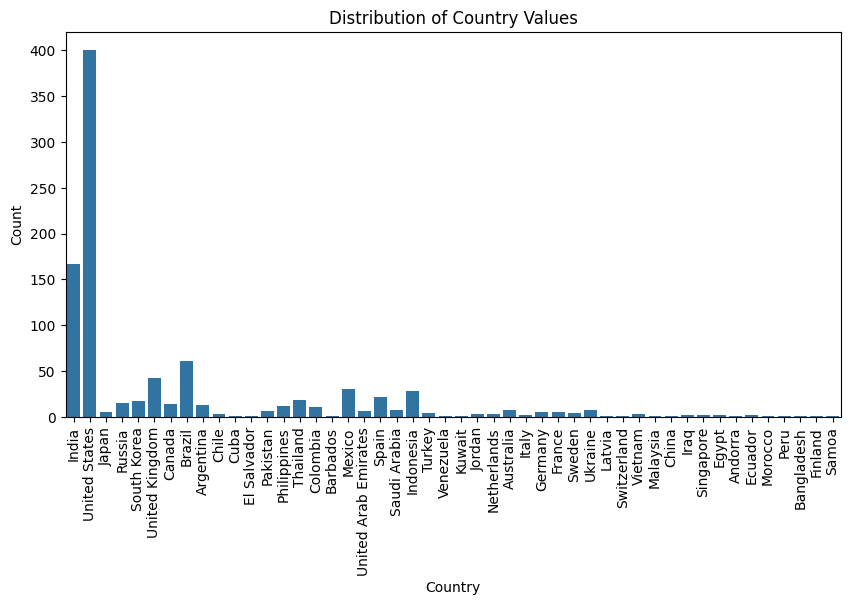

In [486]:
# Replace missing values with the mode
test_df = youtube_df.copy()

test_df['Country'].fillna(test_df['Country'].mode()[0], inplace=True)

# Create a countplot to show the distribution of 'country' values
plt.figure(figsize=(10, 5))
sns.countplot(data=test_df, x='Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

We will be removing the observations with null **`Country`** values.

In [487]:
# Drop observations with null values
youtube_df.dropna(subset=['Country'], inplace=True)
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
943,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
944,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
945,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
946,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


After removing the observations, we will be resetting the indexes ensure there are no gaps and the data remains continuous.



In [488]:
# Reset the index after dropping rows
youtube_df.reset_index(drop=True, inplace=True)
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
849,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
850,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
851,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
852,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


### The "Lowest Monthly Earnings" variable
- **`lowest_monthly_earnings`**: Lowest estimated monthly earnings from the channel \$<br>

We will explore the **`lowest_monthly_earnings`** column and check if it needs any cleaning or preprocessing.

We want to check if there are any values for **`lowest_monthly_earnings`** that are zero (0) or null.

In [489]:
# Check for null values in lowest_monthly_earnings
null_lowestmonthly_df = youtube_df[youtube_df["lowest_monthly_earnings"].eq(0)]
null_lowestmonthly_df.head(10)

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
12,5-Minute Crafts,80.1,26236.790209,Howto & Style,1.0,United Kingdom,0.0,0.00,0.00,0.05,2020.0,6.683440e+07
18,Canal KondZilla,66.5,36775.585925,Music,2572.0,Brazil,0.0,0.00,0.00,0.00,2012.0,2.125594e+08
22,T-Series Bhakti Sagar,61.0,29533.230328,Music,13.0,India,0.0,0.04,0.03,0.48,2018.0,1.366418e+09
85,Ultra Bollywood,36.6,15653.786446,Trailers,9168.0,India,0.0,0.00,0.00,0.00,2009.0,1.366418e+09
103,Ch3Thailand,33.5,29611.914495,Entertainment,96214.0,Thailand,0.0,0.00,0.00,0.00,2014.0,6.962558e+07
127,The Tonight Show Starring Jimmy Fallon,31.2,17111.726160,Comedy,8976.0,United States,0.0,0.00,0.00,0.00,2006.0,3.282395e+08
139,Talking Tom,30.2,15199.330166,Comedy,2.0,United States,0.0,0.00,0.00,0.00,2008.0,3.282395e+08
146,Maluma,29.3,21226.945136,Music,14.0,Argentina,0.0,0.06,0.05,0.72,2015.0,4.493871e+07
147,Zhong,29.2,14727.238483,Entertainment,1513.0,United States,0.0,0.00,0.00,0.00,2015.0,3.282395e+08
159,MrBeast 2,27.5,4552.581106,People & Blogs,27.0,United States,0.0,0.00,0.00,0.00,2011.0,3.282395e+08


In [490]:
# Display the count
null_lowestmonthly_count = youtube_df["lowest_monthly_earnings"].eq(0).sum()
print(f'Number of null values in "lowest_monthly_earnings": {null_lowestmonthly_count}')

Number of null values in "lowest_monthly_earnings": 34


We have 34 observations wherein they have zero (0) or null values for **`lowest_monthly_earnings`**.<br><br>
Since there is the possibility of the earnings coming from sponsorships, affiliate marketing, etc., some of the earnings may not be accurated particularly the null values.
We will be removing these zero (0) or null values to maintain the overall quality and integrity of our dataset. Through removal, we can avoid distorting the underlying patterns in the data and also avoid the complications of imputations. We would still be able to perform a meaningful analysis despite reducing the dataset.

In [491]:
# Drop all observations with zero lowest_monthly_earnings
youtube_df.drop(youtube_df[youtube_df["lowest_monthly_earnings"].eq(0)].index, inplace=True)
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
849,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
850,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
851,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
852,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


After removing the observations, we will be resetting the indexes ensure there are no gaps and the data remains continuous.


In [492]:
# Reset the index after dropping rows
youtube_df.reset_index(drop=True, inplace=True)
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1.366418e+09
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,3.282395e+08
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,3.282395e+08
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1.366418e+09
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
815,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,2.125594e+08
816,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1.366418e+09
817,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,6.683440e+07
818,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,1.028545e+07


We will not be performing any preprocessing in terms of removing outliers as it is possible for channel to have no "earnings" or very high "earnings". 

### The "Highest Monthly Earnings" variable
- **`highest_monthly_earnings`**: Highest estimated monthly earnings from the channel \$<br>

We will explore the **`highest_monthly_earnings`** column and check if it needs any cleaning or preprocessing.

We want to check if there are any values for **`highest_monthly_earnings`** that are zero (0) or null.

In [493]:
# Check for null values in highest_monthly_earnings
null_highestmonthly_df = youtube_df[youtube_df["highest_monthly_earnings"].eq(0)]
null_highestmonthly_df.head(10)

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population


In [494]:
# Display the count
null_highestmonthly_count = youtube_df["highest_monthly_earnings"].eq(0).sum()
print(f'Number of null values in "highest_monthly_earnings": {null_highestmonthly_count}')

Number of null values in "highest_monthly_earnings": 0


We have 0 observations wherein they have zero (0) or null values for **`highest_monthly_earnings`**.

There is no need to drop any observations.

### The "Lowest Yearly Earnings" variable
- **`lowest_yearly_earnings`**: Lowest estimated yearly earnings from the channel \$<br>

We will explore the **`lowest_yearly_earnings`** column and check if it needs any cleaning or preprocessing.

We want to check if there are any values for **`lowest_yearly_earnings`** that are zero (0) or null.

In [495]:
# Check for null values in lowest_yearly_earnings
null_lowestyearly_df = youtube_df[youtube_df["lowest_yearly_earnings"].eq(0)]
null_lowestyearly_df.head(10)

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population


In [496]:
# Display the count
null_lowestyearly_count = youtube_df["lowest_yearly_earnings"].eq(0).sum()
print(f'Number of null values in "lowest_yearly_earnings": {null_lowestyearly_count}')

Number of null values in "lowest_yearly_earnings": 0


We have 0 observations wherein they have zero (0) or null values for **`lowest_yearly_earnings`**.

There is no need to drop any observations.

### The "Highest Yearly Earnings" variable
- **`highest_yearly_earnings`**: Highest estimated monthly earnings from the channel \$<br>

We will explore the **`highest_yearly_earnings`** column and check if it needs any cleaning or preprocessing.

We want to check if there are any values for **`highest_yearly_earnings`** that are zero (0) or null.

In [497]:
# Check for null values in highest_yearly_earnings
null_highestyearly_df = youtube_df[youtube_df["highest_yearly_earnings"].eq(0)]
null_highestyearly_df.head(10)

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population


In [498]:
# Display the count
null_highestyearly_count = youtube_df["highest_yearly_earnings"].eq(0).sum()
print(f'Number of null values in "highest_yearly_earnings": {null_highestyearly_count}')

Number of null values in "highest_yearly_earnings": 0


We have 0 observations wherein they have zero (0) or null values for **`highest_yearly_earnings`**. There is no need for cleaning.

### The "Created Year" variable
- **`created_year`**: Year when the YouTube channel was created<br>

We will explore the **`created_year`** column and check if it needs any cleaning or preprocessing.


We want to check if there are any values for **`created_year`** that are zero (0) or null.

In [499]:
# Check for null values in created_year
null_createdyear_df = youtube_df[youtube_df["created_year"].eq(0)]
null_createdyear_df.head(10)

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population


In [500]:
# Display the count
null_createdyear_count = youtube_df["created_year"].eq(0).sum()
print(f'Number of null values in "created_year": {null_createdyear_count}')

Number of null values in "created_year": 0


We also want to check if there are any values less than 2005 since Youtube was made in this year.

In [501]:
# Check if there are any observations of Youtube channels created before 2005
subset = youtube_df[youtube_df['created_year'] < 2005]
subset


,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population
82,YouTube,36.3,3010.784935,News & Politics,744.0,United States,5300.0,84400.0,63300.0,1000000.0,1970.0,328239523.0


After manual checking, the channel does exist and the year shown is accurate but it may have been an error or a default value (0) in Posix time assigned in the database. 

As we are dealing with years, we will remove the observation instead since incorrect or error values for a year can significantly affect the accuracy and interpretation of the data.

In [502]:
# Get the index of the subset
indices_to_drop = subset.index

# Drop the observations from the original DataFrame
youtube_df.drop(indices_to_drop, inplace=True)

Since the values of the variables are years, it would be appropriate to convert the data type to **`int64`**.
// currently commented out

In [503]:
# Convert the values in the 'created_year' column to integers
# youtube_df['created_year'] = youtube_df['created_year'].astype('int64')

### The "Population" variable
- **`Population`**: Total population of the country<br>

We will explore the  **`Population`** column and check if it needs any cleaning or preprocessing.


We want to check if there are any values for  **`Population`** that are zero (0) or null.

In [504]:
# Check for null values in Population
null_population_df = youtube_df[youtube_df["Population"].eq(0)]
null_population_df.head(10)

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population


In [505]:
# Display the count
null_population_count = youtube_df["Population"].eq(0).sum()
print(f'Number of null values in "Population": {null_population_count}')

Number of null values in "Population": 0


In [506]:
# Check for NaN values in the 'Population' column
nan_subscribers = youtube_df['Population'].isna().sum()
print("Number of NaN values in 'Population' column:", nan_subscribers)

Number of NaN values in 'Population' column: 1


We have 1 observations wherein they have a NaN value for **`Population`**. We will drop this observation.



In [507]:
# Drop rows with NaN values in 'Population' column
youtube_df.dropna(subset=['Population'], inplace=True)

We want to scale the values to millions to make it easier to interpret and visualize. 

In [508]:
# Convert the "Population" column to values in millions
youtube_df['Population'] = youtube_df['Population'] / 1000000
# # Rename the "Population" column to indicate values are in millions
youtube_df = youtube_df.rename(columns={'Population': 'Population (millions)'})
# Round the values to 3 decimal places
youtube_df['Population (millions)'] = youtube_df['Population (millions)'].round(3)
# youtube_df['Population'] = youtube_df['Population'].round(3)

youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population (millions)
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1366.418
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,328.240
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,328.240
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1366.418
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,328.240
...,...,...,...,...,...,...,...,...,...,...,...,...
815,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,212.559
816,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1366.418
817,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,66.834
818,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,10.285


The **`Population`** column is renamed to **`Population (millions)`** to represent the scaling.

### Check Data Types of the Values in each Column

We want to check if the values in each column match their respective data types **`float64`**, **`int64`**, and **`object`**.

In [509]:
# Define the expected data types
expected_data_types = {
    'Youtuber': object,
    'subscribers (millions)': float,
    'video views (millions)': float,
    'uploads': float,
    'Country': object,
    'lowest_monthly_earnings': float,
    'highest_monthly_earnings': float,
    'lowest_yearly_earnings': float,
    'highest_yearly_earnings': float,
    'created_year': float,
    'Population (millions)': float
}

# expected_data_types = {
#     'Youtuber': object,
#     'subscribers': float,
#     'video views': float,
#     'uploads': float,
#     'Country': object,
#     'lowest_monthly_earnings': float,
#     'highest_monthly_earnings': float,
#     'lowest_yearly_earnings': float,
#     'highest_yearly_earnings': float,
#     'created_year': float,
#     'Population': float
# }

# Check if values in each column match the expected data type using a custom function
def check_data_type(column_name, expected_dtype):
    for value in youtube_df[column_name]:
        if not isinstance(value, expected_dtype):
            return False
    return True

all_columns_match = True

for column_name, expected_dtype in expected_data_types.items():
    if not check_data_type(column_name, expected_dtype):
        all_columns_match = False
        print(f"Column '{column_name}' does not match the expected data type {expected_dtype}.")

if all_columns_match:
    print("All columns match the expected data types.")
else:
    print("Not all columns match the expected data types.")

All columns match the expected data types.


### Post Data Cleaning



#### Dataset Information:
- **`Rows/Observations`**: 820
- **`Variables/Columns`**: 12
- **`Data Types`**: float64(9), object(3)

The variables that will be used are as follows:
- **`Youtuber`**: Name of the YouTube channel
- **`subscribers (millions)`**: Number of subscribers to the channel
- **`video views (millions)`**: Overall count views to the channel
- **`category`**: Category or niche of the channel
- **`uploads`**: Total number of videos uploaded on the channel
- **`Country`**: Country where the YouTube channel originates
- **`lowest_monthly_earnings`**: Lowest estimated monthly earnings from the channel \$
- **`highest_monthly_earnings`**: Highest estimated monthly earnings from the channel \$
- **`lowest_yearly_earnings`**: Lowest estimated yearly earnings from the channel \$
- **`highest_yearly_earnings`**: Highest estimated yearly earnings from the channel $
- **`created_year`**: Year when the YouTube channel was created
- **`Population (millions)`**: Total population of the country

In [510]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 0 to 819
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Youtuber                  818 non-null    object 
 1   subscribers (millions)    818 non-null    float64
 2   video views (millions)    818 non-null    float64
 3   category                  818 non-null    object 
 4   uploads                   818 non-null    float64
 5   Country                   818 non-null    object 
 6   lowest_monthly_earnings   818 non-null    float64
 7   highest_monthly_earnings  818 non-null    float64
 8   lowest_yearly_earnings    818 non-null    float64
 9   highest_yearly_earnings   818 non-null    float64
 10  created_year              818 non-null    float64
 11  Population (millions)     818 non-null    float64
dtypes: float64(9), object(3)
memory usage: 83.1+ KB


# Exploratory Data Analysis
    This section of the Jupyter Notebook contains the overall process of our Exploratory Data Analysis of our dataset, together with the questions that we are curious to comprehend and answer through exploratory data analysis.

### 1. What are the lowest and highest yearly earning categories?

**Description**:
- This analysis aims to identify and explore the YouTube content categories or niches that yield the lowest and highest yearly earnings.

**Variables**:
- `category`
- `lowest_yearly_earnings`
- `highest_yearly_earnings`

**Numerical Summary**

Get the lowest and highest yearly earnings of Youtube Channels per category.
Calculate the average yearly earnings for reference as well.

In [511]:
# calculate the average yearly earnings
youtube_df['average_yearly_earnings'] = (youtube_df['lowest_yearly_earnings'] + youtube_df['highest_yearly_earnings']) / 2

average_category_means = youtube_df.groupby('category')['average_yearly_earnings'].mean()

# Sort the categories by mean earnings in descending order
average_category_means = average_category_means.sort_values(ascending=False)

# Display the sorted categories and their mean earnings
average_category_means

category
Shows                    1.403500e+07
Pets & Animals           1.018330e+07
Autos & Vehicles         6.994875e+06
Movies                   5.791050e+06
Sports                   5.699938e+06
Film & Animation         5.161399e+06
People & Blogs           5.084952e+06
Comedy                   4.904557e+06
Education                4.842036e+06
Trailers                 4.621400e+06
News & Politics          4.414874e+06
Entertainment            4.382589e+06
Music                    3.963591e+06
Nonprofits & Activism    2.496375e+06
Gaming                   2.390513e+06
Science & Technology     1.444530e+06
Howto & Style            9.978287e+05
Travel & Events          7.965000e+05
Name: average_yearly_earnings, dtype: float64

**Visualization**

Create a horizontal bar chart to visualize the lowest and highest yearly earnings categories, showing how they compare to one another.

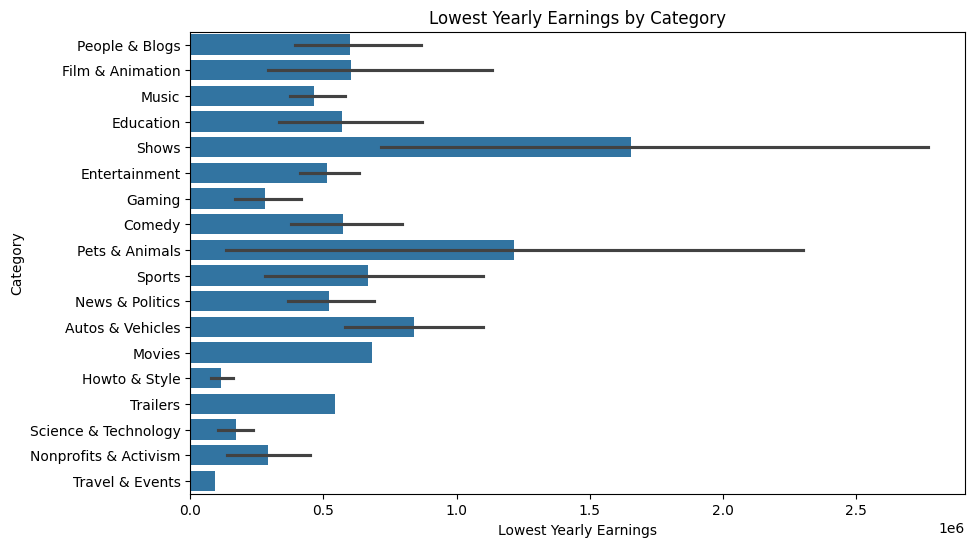

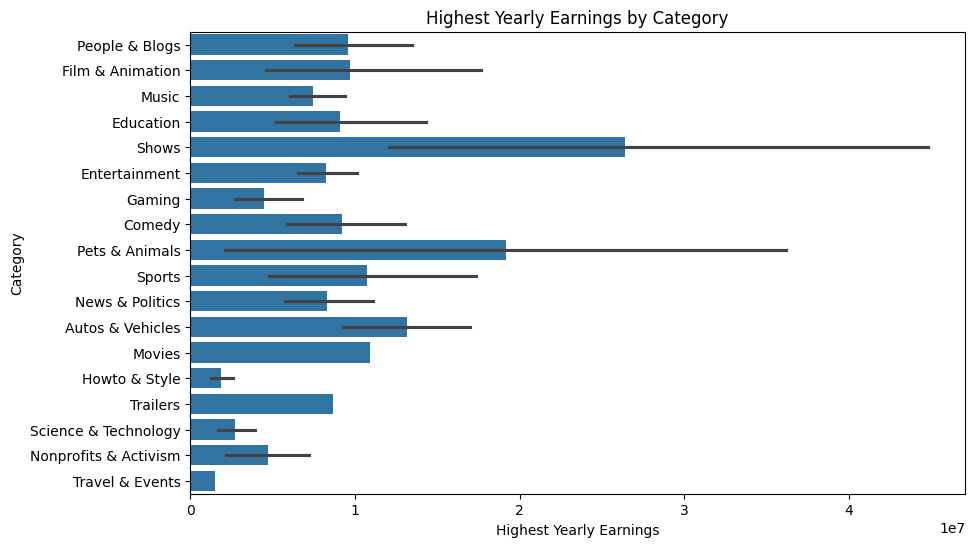

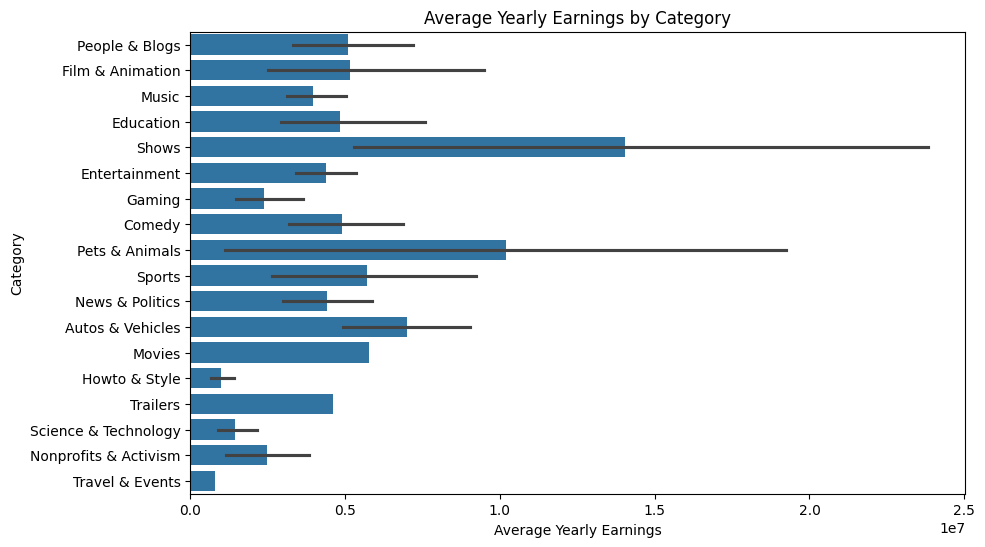

In [512]:
# make category as string
youtube_df['category'] = youtube_df['category'].astype(str)

# create horizontal bar chart for lowest yearly earnings sorted 
plt.figure(figsize=(10, 6))
sns.barplot(data=youtube_df.sort_values(by='lowest_yearly_earnings', ascending=False),
            x='lowest_yearly_earnings', y='category')
plt.xlabel('Lowest Yearly Earnings')
plt.ylabel('Category')
plt.title('Lowest Yearly Earnings by Category')
plt.show()

# create horizontal bar chart for highest yearly earnings sorted 
plt.figure(figsize=(10, 6))
sns.barplot(data=youtube_df.sort_values(by='highest_yearly_earnings', ascending=False),
            x='highest_yearly_earnings', y='category')
plt.xlabel('Highest Yearly Earnings')
plt.ylabel('Category')
plt.title('Highest Yearly Earnings by Category')
plt.show()

# create horizontal bar chart for average yearly earnings sorted 
plt.figure(figsize=(10, 6))
sns.barplot(data=youtube_df.sort_values(by='average_yearly_earnings', ascending=False),
            x='average_yearly_earnings', y='category')
plt.xlabel('Average Yearly Earnings')
plt.ylabel('Category')
plt.title('Average Yearly Earnings by Category')
plt.show()

**Conclusion**

The 'Show' category stands out as the highest-earning category, boasting an impressive average yearly earning of 14,035,000. Following closely, the 'Pets and Animals' category commands a solid average earning of 10,183,300. In contrast, the 'Travel & Events' and 'Howto & Style' categories exhibit comparatively lower average yearly earnings, with figures of 796,500 and 968,481, respectively. These findings shed light on the financial dynamics of different content categories on YouTube, with 'Show' and 'Pets and Animals' leading the way in terms of earnings.


In [513]:
# mean of shows category 
youtube_df[youtube_df['category'] == 'Shows']['average_yearly_earnings'].describe()

count    1.200000e+01
mean     1.403500e+07
std      1.651094e+07
min      1.434800e+06
25%      2.457462e+06
50%      5.231925e+06
75%      2.040000e+07
max      4.650000e+07
Name: average_yearly_earnings, dtype: float64

In [514]:
# mean of travels & events category
youtube_df[youtube_df['category'] == 'Travel & Events']['average_yearly_earnings'].describe()

count         1.0
mean     796500.0
std           NaN
min      796500.0
25%      796500.0
50%      796500.0
75%      796500.0
max      796500.0
Name: average_yearly_earnings, dtype: float64

In [515]:
# mean of pets & animals category
youtube_df[youtube_df['category'] == 'Pets & Animals']['average_yearly_earnings'].describe()

count    2.000000e+00
mean     1.018330e+07
std      1.282225e+07
min      1.116600e+06
25%      5.649950e+06
50%      1.018330e+07
75%      1.471665e+07
max      1.925000e+07
Name: average_yearly_earnings, dtype: float64

In [516]:
# mean of howto & style category
youtube_df[youtube_df['category'] == 'Howto & Style']['average_yearly_earnings'].describe()

count    3.300000e+01
mean     9.978287e+05
std      1.083816e+06
min      1.648000e+03
25%      3.697000e+05
50%      6.900000e+05
75%      1.115800e+06
max      4.941900e+06
Name: average_yearly_earnings, dtype: float64

### 2. Is there a correlation between video views and subscriber counts on YouTube channels?

**Description**
- This analysis investigates the relationship between the number of video views and the number of subscribers on YouTube channels to determine if there's a correlation indicating viewer engagement.

**Variables**
- `video views`
- `subscribers`

**Numerical Summary**

Calculate the Pearson correlation coefficient to quantify the strength and direction of the correlation between video views and subscribers.


In [517]:
# calculate pearson correlation betwen video views and subscribers
youtube_df['video views (millions)'].corr(youtube_df['subscribers (millions)'])
# youtube_df['video views'].corr(youtube_df['subscribers'])


0.8403978233213484

**Visualization**

Create a scatterplot to visualize the relationship between video views and subscribers, indicating the nature of the correlation.

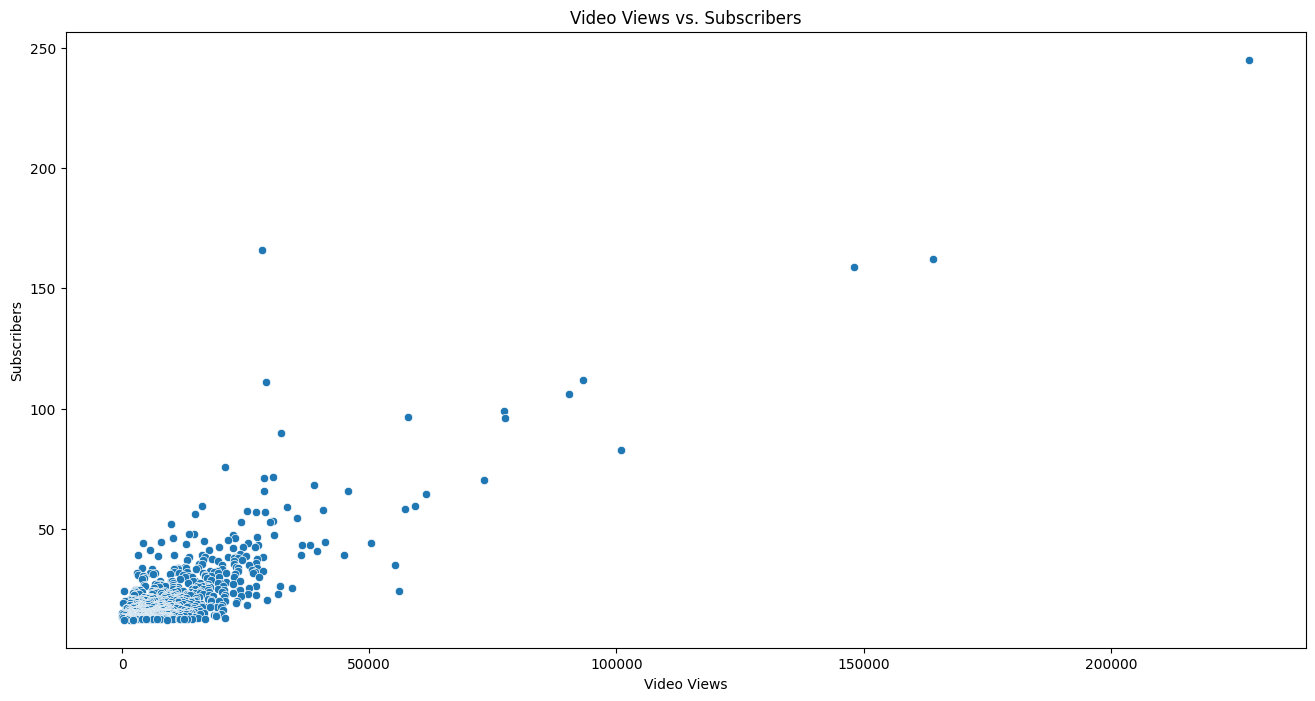

In [518]:
# scatterplot by using
plt.figure(figsize=(16, 8))
sns.scatterplot(x='video views (millions)', y='subscribers (millions)', data=youtube_df)
# sns.scatterplot(x='video views', y='subscribers', data=youtube_df)
plt.xlabel('Video Views')
plt.ylabel('Subscribers')
plt.title('Video Views vs. Subscribers')
plt.show()

**Conclusion**

The Pearson correlation value produced by the relationship between video views and subscriber count was 0.7509576173780214, and since the r value greater than 0.5, there is a strong relationship and a positive correlation between the video views and the subscriber count of a Youtube Channel.

### 3. Is there a correlation between video views and average yearly earnings on YouTube channels?

**Description**
- This analysis explores whether there's a correlation between the number of video views and the monthly earnings of YouTube channels, offering insights into the monetization potential of views.

**Variables**
- `video views`
- `lowest_yearly_earnings`
- `highest_yearly_earnings`

**Numerical Summary**

Calculate the correlation coefficient to determine the strength and direction of the correlation between video views and average yearly earnings

In [519]:
# calculate average yearly earnings
# youtube_df['average_yearly_earnings'] = (youtube_df['lowest_yearly_earnings'] + youtube_df['highest_yearly_earnings']) / 2

# calculate pearson correlation betwen video views and average yearly earnings
youtube_df['video views (millions)'].corr(youtube_df['average_yearly_earnings'])
# youtube_df['video views'].corr(youtube_df['avg_yearly_earnings'])

0.5846924947490479

**Visualization**

Create a scatterplot to visualize the relationship between video views and average yearly earnings, highlighting the nature of the correlation.


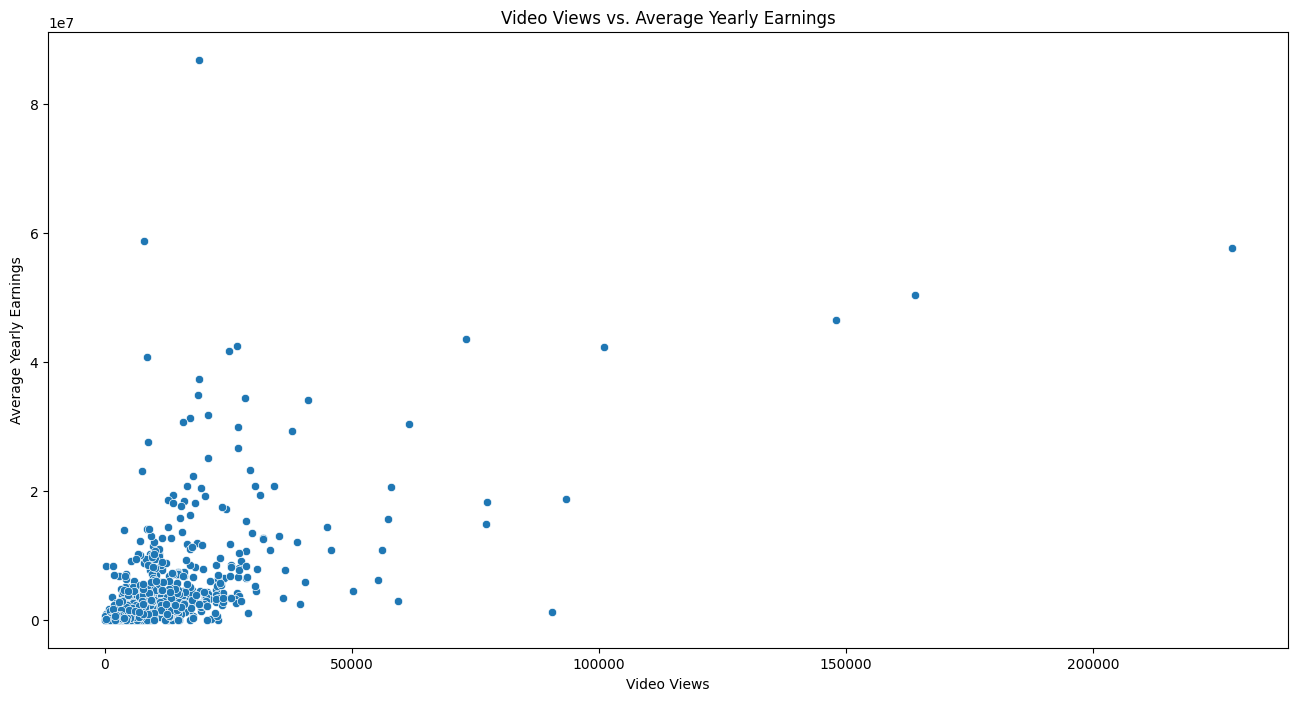

In [520]:
# visualize the data
plt.figure(figsize=(16, 8))
sns.scatterplot(x='video views (millions)', y='average_yearly_earnings', data=youtube_df)
# sns.scatterplot(x='video views', y='avg_yearly_earnings', data=youtube_df)
plt.xlabel('Video Views')
plt.ylabel('Average Yearly Earnings')
plt.title('Video Views vs. Average Yearly Earnings')
plt.show()

**Conclusion**

The correlation coefficient only produced a value of 0.58, which means that it only produced a medium positive correlation.

### 4. Are there discernible patterns related to a YouTube channel's category and its subscribers?


**Description**:
- We aim to explore if there are discernible patterns related to a YouTube channel's category and its subscribers. We will perform numerical summary and visualization to analyze the data.

**Variables**:
- `subscribers` : The number of subscribers for YouTube channels.
- `category` : The category of the YouTube channels.


**Numerical Summary**

We calculated summary statistics for the `subscribers` column using youtube_df['subscribers'].describe(). The subscribers column represents the `average number of subscribers` for each YouTube channel within their respective categories.

In [521]:
subscribers_summary = youtube_df['subscribers (millions)'].describe()
# subscribers_summary = youtube_df['subscribers'].describe()

# Display the summary statistics
subscribers_summary

count    818.000000
mean      22.612836
std       17.260865
min       12.300000
25%       14.500000
50%       17.450000
75%       24.075000
max      245.000000
Name: subscribers (millions), dtype: float64

**Visualization**

We created a horizontal bar chart to display the average subscribers for each category, using the average_subscribers_by_category variable. The x-axis represents the average subscribers (in millions), and the y-axis displays the categories. The chart is color-coded for better visualization.

C:\Users\Andre\AppData\Local\Temp\ipykernel_4644\2848895653.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_subscribers_by_category.values, y=average_subscribers_by_category.index, palette="viridis", orient="h")


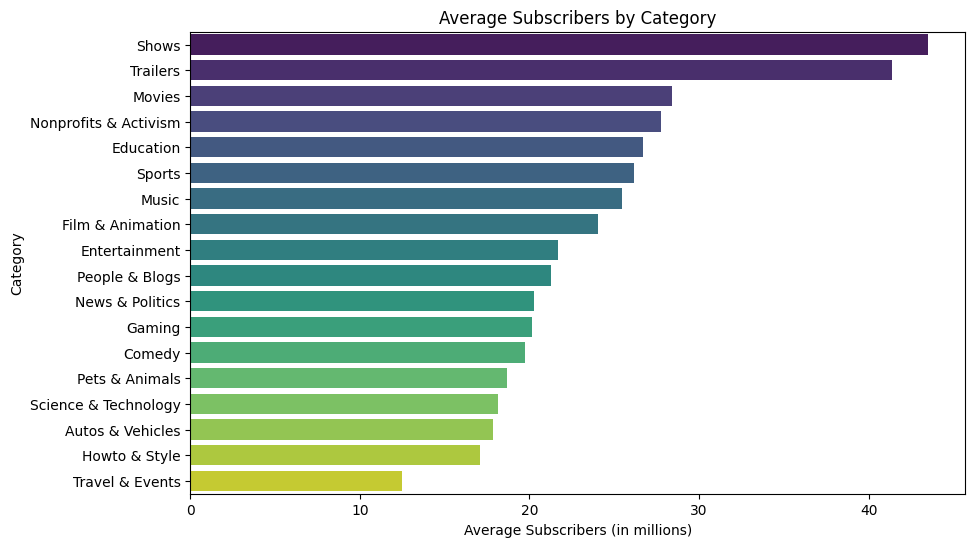

In [522]:
# Bar Chart - Average Subscribers by Category
average_subscribers_by_category = youtube_df.groupby('category')['subscribers (millions)'].mean().sort_values(ascending=False)
# average_subscribers_by_category = youtube_df.groupby('category')['subscribers'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_subscribers_by_category.values, y=average_subscribers_by_category.index, palette="viridis", orient="h")
plt.title('Average Subscribers by Category')
plt.xlabel('Average Subscribers (in millions)')
# plt.xlabel('Average Subscribers')
plt.ylabel('Category')
plt.show()

**Conclusion**

From our analysis, we have found discernible patterns related to a YouTube channel's category and its subscribers. The analysis revealed the following:

- Shows had the highest average number of subscribers, with an average of over 4 million subscribers.

- Trailers came in second place in terms of average subscribers.

- Film & Animation occupied the third position in terms of average subscribers.

- Pets & Animals had the third-to-last position with lower average subscribers.

- Autos & Vehicles ranked second to last in terms of average subscribers.

- Travel & Events was the category with the lowest average number of subscribers.

These patterns suggest that the type of content and category significantly influences the average number of subscribers on YouTube channels. Channels in the "Shows" category, on average, tend to have the most subscribers, while those in the "Travel & Events" category have the fewest. This information can be valuable for content creators and marketers looking to understand subscriber trends on YouTube.

### 5. Are there discernible patterns related to a YouTube channel's category and its average yearly earnings?

**Description**:
- We aim to investigate if there are discernible patterns related to a YouTube channel's category and its average yearly earnings. We will conduct numerical summary and visualization to analyze the data.


**Variables**:
- `category` : The category of the YouTube channels.
- `lowest_yearly_earnings` : The lowest estimated yearly earnings of the YouTube channels.
- `highest_yearly_earnings` : The highest estimated yearly earnings of the YouTube channels.


**Numerical Summary**

We will calculate summary statistics for the 'average_yearly_earnings' column, which is the sum of the lowest and highest yearly earnings. This column represents the average yearly earnings for each YouTube channel within their respective categories.

In [523]:
# youtube_df['average_yearly_earnings'] = youtube_df['lowest_yearly_earnings'] + youtube_df['highest_yearly_earnings']

youtube_df['average_yearly_earnings'].describe()

count    8.180000e+02
mean     4.266087e+06
std      7.607983e+06
min      5.350000e-01
25%      6.900125e+05
50%      1.859450e+06
75%      4.462800e+06
max      8.680000e+07
Name: average_yearly_earnings, dtype: float64

**Visualization**

We will create a horizontal bar chart to visualize the average yearly earnings for each category, using the average_yearly_earnings_by_category variable. The x-axis will represent the average yearly earnings (in dollars), and the y-axis will display the categories. The chart will be color-coded for better visualization.

C:\Users\Andre\AppData\Local\Temp\ipykernel_4644\592967771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_yearly_earnings_by_category.values, y=average_yearly_earnings_by_category.index, palette="viridis", orient="h")


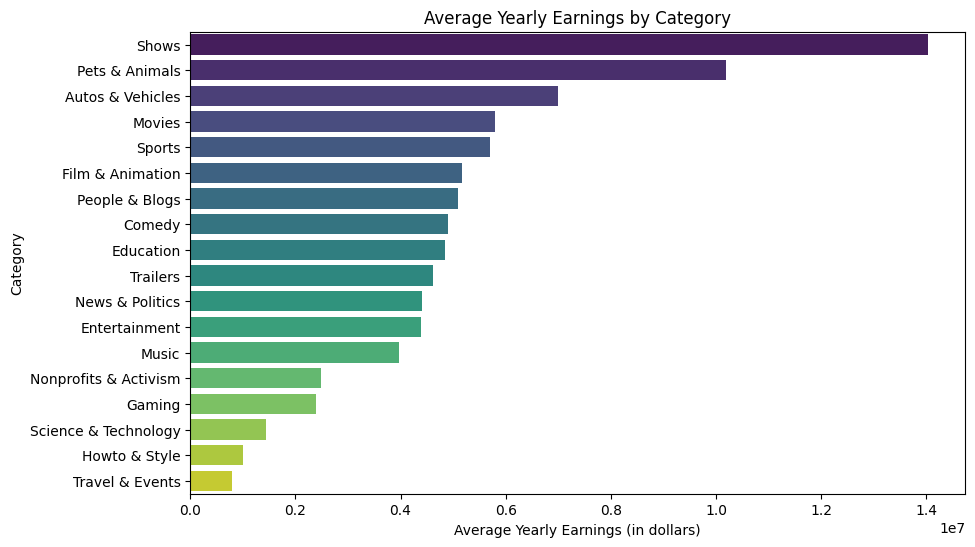

In [524]:
# Bar Chart - Average Yearly Earnings by Category
average_yearly_earnings_by_category = youtube_df.groupby('category')['average_yearly_earnings'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_yearly_earnings_by_category.values, y=average_yearly_earnings_by_category.index, palette="viridis", orient="h")
plt.title('Average Yearly Earnings by Category')
plt.xlabel('Average Yearly Earnings (in dollars)')
plt.ylabel('Category')
plt.show()

**Conclusion**

Conclusion:
From our analysis, we have found discernible patterns related to a YouTube channel's category and its average yearly earnings, calculated as the sum of the lowest and highest yearly earnings. The analysis reveals the following:

- Shows had the highest average yearly earnings, with an average of 1.4 million dollars.

- Autos & Vehicles came in second place in terms of average yearly earnings.

- Sports occupied the third position in terms of average yearly earnings.

- Science & Technology had the third-to-last position with lower average yearly earnings.

- Howto & Style ranked second to last in terms of average yearly earnings.

- Travel & Events was the category with the lowest average yearly earnings.

These patterns suggest that the category of content significantly influences the average yearly earnings of YouTube channels. Channels in the "Shows" category, on average, tend to have the highest earnings, while those in the "Travel & Evetns" category have the lowest earnings. This information can be valuable for content creators and marketers looking to understand earning trends on YouTube.

### 6. What is the distribution of video views for YouTube channels within each content category?

**Description**:
- We aim to explore the distribution of video views for YouTube channels within each content category.


**Variables**:
- `category` : The category of the YouTube channels.
- `video views` : The number of video views for each YouTube channel.


**Numerical Summary**

Calculate the summary statistics for the 'video_views' column within each category. This will help us understand the distribution of video views, including measures like the median, quartiles, and potential outliers for each category.

In [525]:
# calculate mean of video views within each category 
views_summary = youtube_df.groupby('category')['video views (millions)'].describe()
# views_summary = youtube_df.groupby('category')['video views'].describe()

views_summary

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Autos & Vehicles,2.0,7501.729071,2964.425984,5405.563355,6453.646213,7501.729071,8549.811928,9597.894786
Comedy,58.0,7555.251793,6404.583469,1001.465469,3281.171939,5351.060414,10078.052476,34300.482066
Education,44.0,15448.128898,25931.842454,20.563378,3495.474282,7826.723552,15625.610348,164000.000000
Entertainment,212.0,10795.430785,10313.490400,140.022442,4619.410027,7948.694256,13132.063074,77180.169894
Film & Animation,32.0,12661.945810,12334.406261,902.225615,5611.928728,8592.232546,13293.304661,59316.472754
Gaming,83.0,7582.601556,6199.594791,374.123483,2979.944145,5956.193599,9081.683891,29058.044447
Howto & Style,33.0,3868.477766,2058.999224,264.228052,2609.358468,3445.794123,4733.873025,10414.479943
Movies,1.0,10062.770060,NaN,10062.770060,10062.770060,10062.770060,10062.770060,10062.770060
Music,175.0,15412.087680,18709.044603,559.765455,7231.711651,12140.232004,18856.544268,228000.000000


**Visualization**

Create a box plot and bar chart to visually represent the distribution of video views for each category. Box plots are effective for showing the central tendency and spread of data within categories.

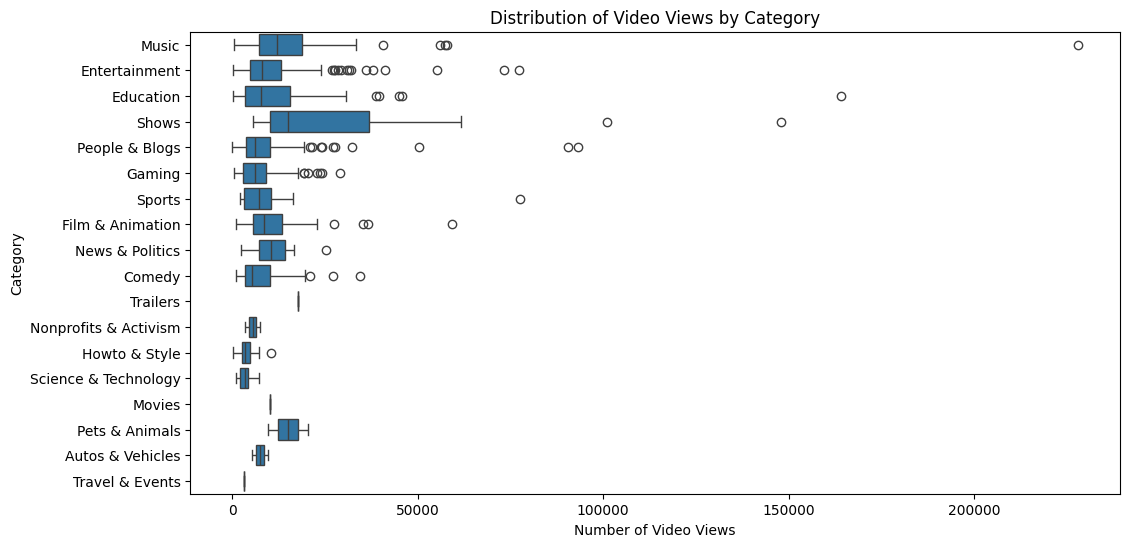

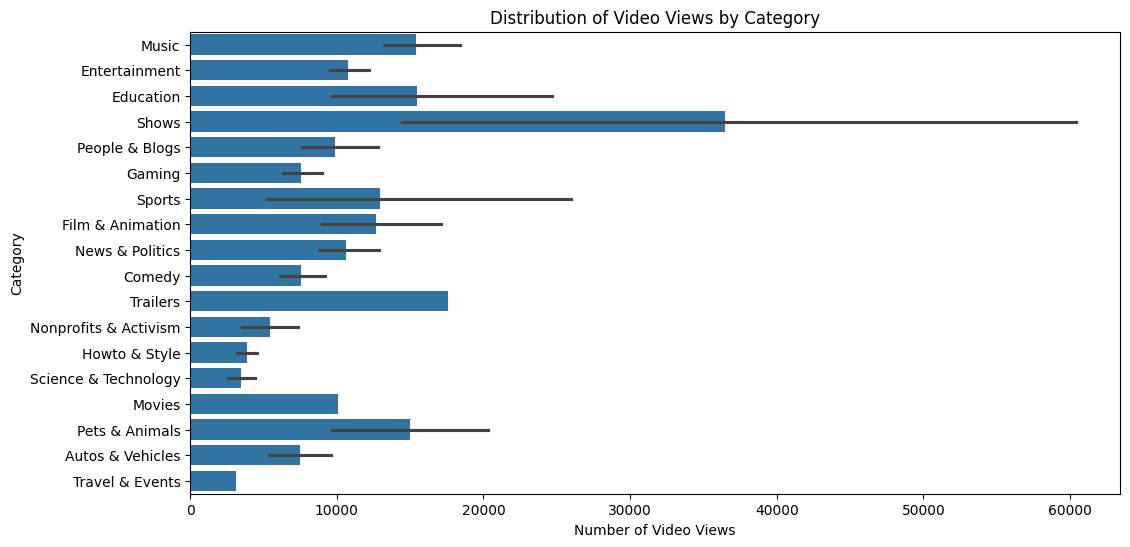

In [526]:
# Horizontal Box Plot - Distribution of Video Views by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='video views (millions)', y='category', data=youtube_df)
# sns.boxplot(x='video views', y='category', data=youtube_df)
plt.title('Distribution of Video Views by Category')
plt.xlabel('Number of Video Views')
plt.ylabel('Category')
plt.show()

# Horizontal Bar Chart - Distribution of Video Views by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='video views (millions)', y='category', data=youtube_df)
# sns.barplot(x='video views', y='category', data=youtube_df)

plt.title('Distribution of Video Views by Category')
plt.xlabel('Number of Video Views')
plt.ylabel('Category')
plt.show()

**Conclusion**

Based from our EDA,  in terms of the distribution number of video views per category, the results revealed the following:
1. The Shows youtube category has the highest number of video views, out of all other youtube categories.
2. The following youtube categories: Trailers, Movies, Travels & Events only have an instance of one YouTube channel, while Nonprofits & Activism, Pets & Animals, and Autos & Vehicles  only have an instance of two YouTube channels. Despite the low number of YouTube Channels in these particular categories, this explains the abnormally small distribution of data within the box plot and the bar chart. Yet still yield a high number of video views.

### 7. What are the most prevalent YouTube channel categories in the dataset?

Description:
- How many channels are in each category?

Variables:
- `category`
- `Youtube Channels`

**Numerical Summary**

Count the frequency of YouTube channels within each unique category.

In [527]:
category_counts = youtube_df['category'].value_counts()

# Display the count of each unique value
print("Count of each unique value in 'category':")
print(category_counts)

Count of each unique value in 'category':
category
Entertainment            212
Music                    175
People & Blogs           110
Gaming                    83
Comedy                    58
Education                 44
Howto & Style             33
Film & Animation          32
News & Politics           24
Science & Technology      14
Shows                     12
Sports                    12
Nonprofits & Activism      2
Pets & Animals             2
Autos & Vehicles           2
Trailers                   1
Movies                     1
Travel & Events            1
Name: count, dtype: int64


**Visualization**

Create a bar chart to visualize the distribution of YouTube channels across unique categories.

C:\Users\Andre\AppData\Local\Temp\ipykernel_4644\910500672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis", orient="h")


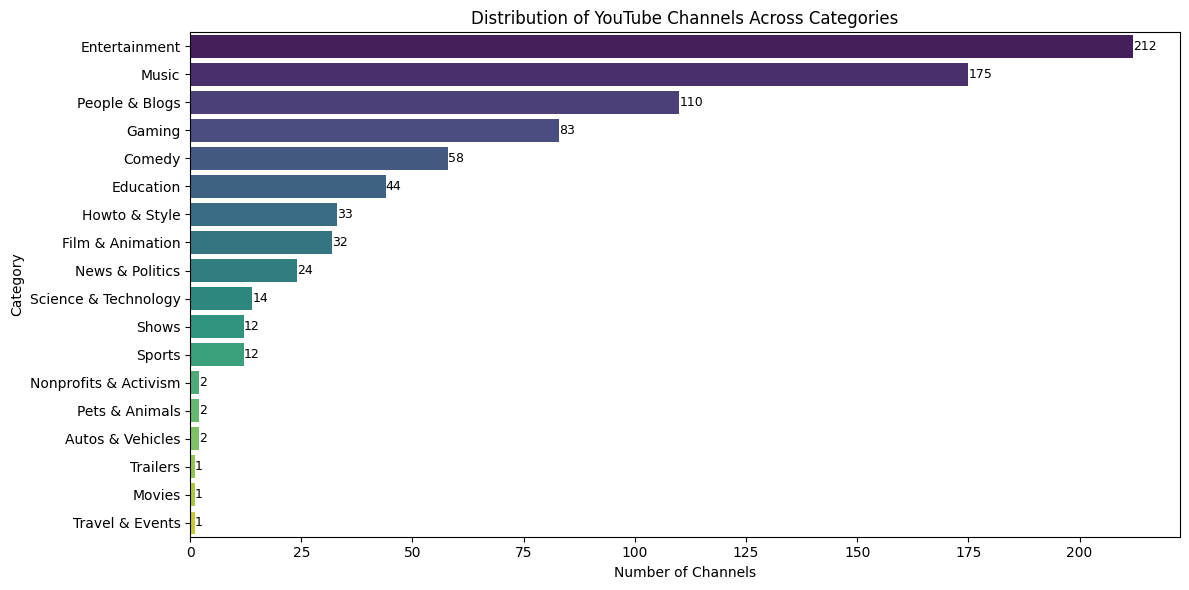

In [528]:
# create a bar chart to visualize the distribution of YouTube channels across categories
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis", orient="h")
ax.set(xlabel='Number of Channels', ylabel='Category')
plt.title('Distribution of YouTube Channels Across Categories')

# Add data labels to the right of each bar for readability
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', xy=(width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()  # Ensure labels and titles fit in the plot area
plt.show()


**Conclusion**

Notably, the Entertainment category stands out as the most prominent, encompassing approximately 20% of the channels, totaling around 212 channels. Following closely is the Music category, with 175 channels falling under this classification. The next three top categories include People & Blogs, Gaming, and Comedy. It's interesting to note that despite the Pets and Animals category being among the highest earners, it is represented by only 2 channels in our dataset, underscoring the niche nature of this content within the YouTube landscape.

### 8. What is the distribution of YouTube channels by their country of origin in the dataset? Retrieve the top 15 countries.

Description:
- aims to identify the top 15 countries with most amount of channels.

Variables:
- `Country`
- `Youtube Channels`

**Numerical Summary**

Get the frequency of YouTube channels from each country.

Retrieve the top 15 countries with most frequency of YouTube channels.

country_counts = youtube_df['Country'].value_counts()

In [529]:
top_15_countries = country_counts[:15]

top_15_countries

Country
United States     306
India             167
Brazil             61
United Kingdom     43
Mexico             30
Indonesia          28
Spain              22
Thailand           18
South Korea        17
Russia             15
Canada             14
Argentina          13
Philippines        12
Colombia           11
Ukraine             8
Name: count, dtype: int64

**Visualization**

Create a bar chart to visualize the distribution of YouTube channels by country – showing only the top 15.

C:\Users\Andre\AppData\Local\Temp\ipykernel_4644\4159285927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_15_countries.values, y=top_15_countries.index, palette="viridis", orient="h")


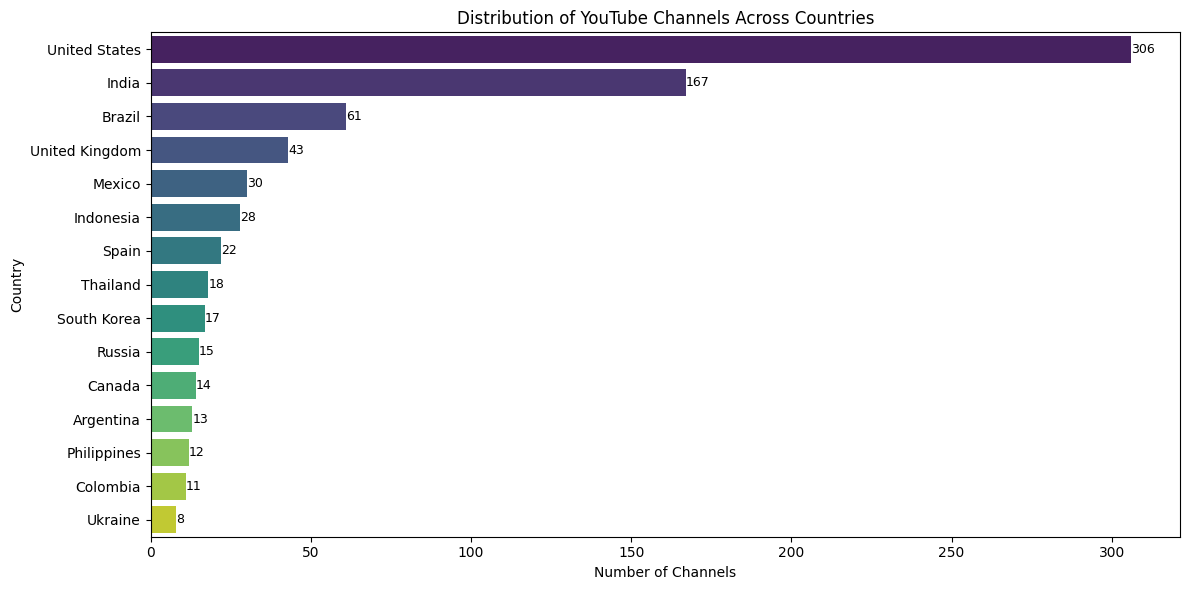

In [530]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = sns.barplot(x=top_15_countries.values, y=top_15_countries.index, palette="viridis", orient="h")
ax.set(xlabel='Number of Channels', ylabel='Country')
plt.title('Distribution of YouTube Channels Across Countries')

# Add data labels to the right of each bar for readability
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', xy=(width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()  # Ensure labels and titles fit in the plot area
plt.show()

**Conclusion**

The distribution of channels in our exploratory data analysis reveals a clear dominance by the United States and India, with the United States leading with 306 channels and India following closely with approximately 167 channels. Beyond these two leaders, the distribution becomes less pronounced, with countries like Brazil, the United Kingdom, Mexico, and others falling within a range of approximately 65 channels, showing a less significant presence in this context.

# Research Question
    This section of the Jupyter Notebook contains this study's Research Question that we wish to answer based from our results and findings from the Exploratory Data Ananlysis.

    After careful consideration of our observations and analysis, we want to answer the following research question.
### What are the key factors that makes a YouTube Channel Successfull?

#### In connection with the EDA's...
Based on our exploratory data analysis, it is evident that determining the success of a YouTube channel is a wide ranging task; it is not solely reliant on one variable. Our findings reveal that a channel can excel in certain metrics while falling short in others. A noteworthy case in point is the earnings of successful YouTube channels, where some channels with high view and subscriber counts may generate minimal or no revenue due to certain reasons, and conversely, some less prominent channels might generate substantial earnings. with that said, there are some metrics that do have some sort of correlation with each other. The positive correlation between subscriber count and view count for a YouTube channel means that having a higher subscriber count means having a higher view count. 

Our data analysis suggests that there are potential factors that have a positive correlation with the metrics that determine the success of a YouTube channel. These factors include a channel’s category of content and country origin. However, further study is needed to specifically find the correlation of a potential factor to each given metric of success.


#### Description:

- Analyzing the observations from our exploratory data analysis, we have observed that there are existing key factors that explains the high values in some the YouTube Metrics
- A YouTube Channel’s success can be derived from these existing factors which explains why a given YouTube Channel’s Analytics considers metrics such as impressions, click-through, likes, shares, view count, subscriber, and the list goes on. Youtube Channel Analytics is a bird’s eye view to monitor its channel vitals, like real-time views, total views, watch time, subscribers, etc. It is perfect for getting a performance overview over a period at a quick glance.
- In consideration of YouTube's Algorithm, it also looks at the demography of viewer's video relevance and category and recommends it to similar audiences. 
- In addition, considering a success metric that will determine “success” for a youtube video, this would include subscribers, video views, earnings, rankings(overall and country). We test out other parameters in the dataset that we can consider “factors”, this could be country, population count of the country, category and category rank, education attainment, urban population, employment rate.

### Significance of the Study

    In determining the factors that enhances a YouTube Channel’s success, it carries substantial importance on various fronts. It provides practical guidance for content creators, empowering them to make data-driven choices about their content and strategies. This research has broader industry implications as it aids businesses in optimizing their marketing endeavors on the YouTube platform. Moreover, unraveling these success factors contributes to the academic understanding of digital media, informs evidence-based decision-making, and can potentially influence policies and regulations pertaining to online content. This study could extend its impact to a wider spectrum, offering insights into the dynamics of content creation and user engagement in the digital realm, making it a multidimensional and highly pertinent field of inquiry.



# Phase 2

    As we delve into the second phase of our case study on Global YouTube Statistics, we will be focusing on three interconnected sections: data modeling, statistical inference, and insights and conclusions. 

This phase of our study is dedicated to unraveling the intricate web of data that underlies the vast YouTube ecosystem, drawing insightful conclusions from the analysis, and shedding light on the broader implications for content creators, consumers, and the platform itself. By meticulously examining the data and applying rigorous statistical techniques, we aim to uncover the patterns, trends, and behaviors that define the global YouTube landscape, ultimately providing valuable insights into the dynamic and ever-expanding world of online video content.

# Dependent and Independent Variable
    In this notebook, our selected dataset and based from our research question, yields us the following variables...

### Dependent Variable 
- **`subscribers (millions)`**: Number of subscribers to the channel
    - **`rank`**: Position of the YouTube channel based on the number of subscribers


- **`video views (millions)`**: Overall count views to the channel
    - **`video_views_rank`**: Ranking of the channel based on total video views


- **`earnings`**: Total earnings of the youtuber
    - **`Monthly Earnings`**:
        - **`lowest_monthly_earnings`**: Lowest estimated monthly earnings from the channel in Dollars
        - **`highest_monthly_earnings`**: Highest estimated monthly earnings from the channel in Dollars
    - **`Yearly Earnings`**:
        - **`lowest_yearly_earnings`**: Lowest estimated yearly earnings from the channel in Dollars
        - **`highest_yearly_earnings`**: Highest estimated yearly earnings from the channel in Dollars 

### Independent Variables
- **`Youtuber`**: Name of the YouTube channel
- **`category`**: Category or niche of the channel
- **`uploads`**: Total number of videos uploaded on the channel
- **`Country`**: Country where the YouTube channel originates
- **`video_views_for_the_last_30_days`**: Total video views in the last 30 days
- **`Population (millions)`**: Total population of the country
- **`Unemployment rate`**: Unemployment rate in the country %
- **`Urban_population`**: Percentage of the population living in urban areas %
- **`created_year`**: Year when the YouTube channel was created
- **`created_month`**: Month when the YouTube channel was created



## Data Modelling

In the data modeling section of our study, we focus on constructing a visual models to capture the intricacies of the dataset. 

### Objective
Our primary objective here is to gather and organize a diverse set of data points, including viewership statistics, engagement metrics, demographics, and content categories. Through data cleaning, transformation, and structuring, we create a structured dataset that forms the foundation for our subsequent statistical analyses. This structured data helps unveil hidden patterns and relationships within the vast dataset. By methodically representing the characteristics of YouTube content, creators, and viewers, we pave the way for deeper insights into the platform's dynamics, leading to a more comprehensive understanding of the factors driving the global YouTube phenomenon.



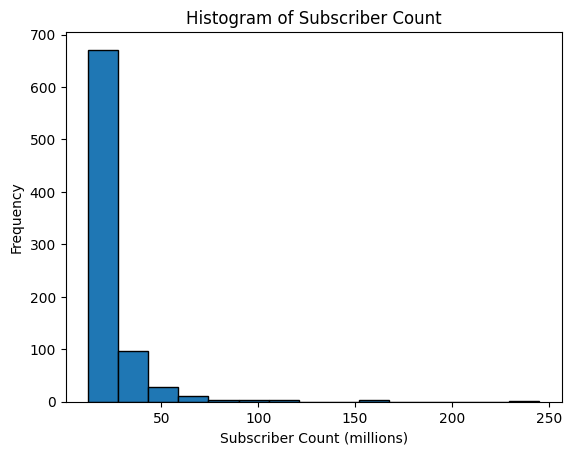

In [531]:
# Plotting the histogram
plt.hist(youtube_df['subscribers (millions)'], bins=15, edgecolor='black')

# Adding labels and title
plt.xlabel('Subscriber Count (millions)')
plt.ylabel('Frequency')
plt.title('Histogram of Subscriber Count')

# Displaying the histogram
plt.show()


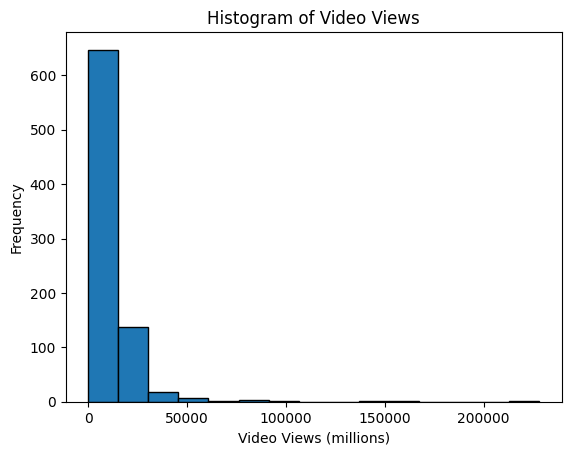

In [532]:
# Plotting the histogram
plt.hist(youtube_df['video views (millions)'], bins=15, edgecolor='black')

# Adding labels and title
plt.xlabel('Video Views (millions)')
plt.ylabel('Frequency')
plt.title('Histogram of Video Views')

# Displaying the histogram
plt.show()



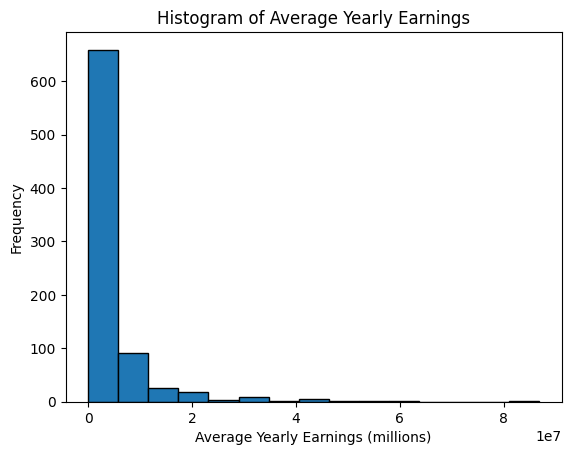

In [533]:
youtube_df['average_yearly_earnings'] = (youtube_df['lowest_yearly_earnings'] + youtube_df['highest_yearly_earnings']) / 2

# Plotting the histogram
plt.hist(youtube_df['average_yearly_earnings'], bins=15, edgecolor='black')

# Adding labels and title
plt.xlabel('Average Yearly Earnings (millions)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Yearly Earnings')

# Displaying the histogram
plt.show()


## Data Preprocessing

insert 

In this project, the user performed data preprocessing to prepare the data for analysis. Specifically, outlier detection and removal were performed on several columns including 'subscribers (millions)', 'video views (millions)', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', and 'created_year'. This was done to ensure the accuracy of the data and to address any potential skewness or bias in the data.



In [534]:
# float64_columns = youtube_df.select_dtypes(include=['float64']).columns
# z_score_threshold = 3
# filtered_df = youtube_df.copy()

# for column_name in float64_columns:
#     column_data = filtered_df[column_name]
#     filtered_df = filtered_df[(np.abs(stats.zscore(column_data)) < z_score_threshold)]

# youtube_df = filtered_df

# youtube_df

Additionally, normalization was performed on pairs of data to address any potential issues with scale and distribution. This was done on the pairs 'subscribers (millions)', 'uploads', 'subscribers (millions)', 'Population (millions)', 'subscribers (millions)', 'created_year', and 'video views (millions)', 'Population (millions)'. This step was crucial in preparing the data to answer certain hypotheses

In [535]:
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population (millions),average_yearly_earnings
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1366.418,57600000.0
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,328.240,34350000.0
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,328.240,50350000.0
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1366.418,46500000.0
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,328.240,18650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,212.559,14100000.0
816,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1366.418,1647100.0
817,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,66.834,1700.5
818,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,10.285,98700.0


The 

## Statistical Inference

In the statistical inference section of our study, we delve into the heart of our data analysis, seeking to draw meaningful conclusions and insights from the structured YouTube dataset. Through a rigorous application of statistical techniques and methodologies, we aim to extract valuable information about the platform's performance, trends, and user behaviors. Statistical inference allows us to identify patterns, correlations, and dependencies within the data, offering answers to critical questions about user engagement, content preferences, and the impact of various factors on YouTube's success.

By conducting hypothesis tests, regression analyses, and other statistical procedures, we can make informed assessments of the relationships between different variables. Moreover, we explore the significance of various factors, such as video length, publication time, and audience demographics, in influencing viewership and engagement. This section of our study enables us to provide evidence-based insights into the factors contributing to the dynamics of YouTube's global ecosystem, helping content creators, businesses, and researchers better understand how to navigate and succeed in the ever-evolving world of online video content.

## Hypothesis 1

### Hypothesis 1.1:  Is rank associated/dependent with the channel’s country of origin?
Description: We group would like to know if a YouTube Channel's Rank has any relational association between the YouTube Channel's country of origin? (placeholder only)

**`Null Hypothesis:`** There is no association or dependency between the rank of channels and their country of origin. Mathematically

**`Alternative Hypothesis:`** There is a significant association or dependency between the rank of channels and their country of origin.


In [536]:
# Calling the youtube dataframe to check the data
youtube_df

,Youtuber,subscribers (millions),video views (millions),category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Population (millions),average_yearly_earnings
0,T-Series,245.0,228000.000000,Music,20082.0,India,564600.0,9000000.0,6800000.0,108400000.0,2006.0,1366.418,57600000.0
1,MrBeast,166.0,28368.841870,Entertainment,741.0,United States,337000.0,5400000.0,4000000.0,64700000.0,2012.0,328.240,34350000.0
2,Cocomelon - Nursery Rhymes,162.0,164000.000000,Education,966.0,United States,493800.0,7900000.0,5900000.0,94800000.0,2006.0,328.240,50350000.0
3,SET India,159.0,148000.000000,Shows,116536.0,India,455900.0,7300000.0,5500000.0,87500000.0,2006.0,1366.418,46500000.0
4,___ Kids Diana Show,112.0,93247.040539,People & Blogs,1111.0,United States,182900.0,2900000.0,2200000.0,35100000.0,2015.0,328.240,18650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Natan por A__,12.3,9029.609749,Sports,1200.0,Brazil,138100.0,2200000.0,1700000.0,26500000.0,2017.0,212.559,14100000.0
816,Free Fire India Official,12.3,1674.409945,People & Blogs,1500.0,India,16200.0,258900.0,194200.0,3100000.0,2018.0,1366.418,1647100.0
817,Panda,12.3,2214.684303,Gaming,2452.0,United Kingdom,17.0,268.0,201.0,3200.0,2006.0,66.834,1700.5
818,RobTopGames,12.3,374.123483,Gaming,39.0,Sweden,968.0,15500.0,11600.0,185800.0,2012.0,10.285,98700.0


In [537]:
# Create a table to show the Youtube channels with the highest number of subscribers and their country of origin.
hp1_1_table = pd.crosstab(youtube_df['subscribers (millions)'], youtube_df['Country'])
hp1_1_table

# hp1_1_table = youtube_df.groupby('Country')['subscribers (millions)'].sum()
# hp1_1_table

Country,Argentina,Australia,Barbados,Brazil,Canada,Chile,China,Colombia,Cuba,Ecuador,...,Sweden,Switzerland,Thailand,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam
subscribers (millions),,,,,,,,,,,,,,,,,,,,,
12.3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
12.4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,5,0,0
12.5,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
12.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,0
12.7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
159.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [538]:
chi2, p, degrees_of_freedom, expected = chi2_contingency(hp1_1_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", degrees_of_freedom)
print("Expected Frequencies Table: \n", expected)

Chi-Square Statistic: 11761.281931949889
P-value: 0.16038486045592956
Degrees of Freedom: 11610
Expected Frequencies Table: 
 [[7.33496333e-02 4.88997555e-02 6.11246944e-03 ... 1.77872861e+00
  6.11246944e-03 1.83374083e-02]
 [2.20048900e-01 1.46699267e-01 1.83374083e-02 ... 5.33618582e+00
  1.83374083e-02 5.50122249e-02]
 [2.49388753e-01 1.66259169e-01 2.07823961e-02 ... 6.04767726e+00
  2.07823961e-02 6.23471883e-02]
 ...
 [1.46699267e-02 9.77995110e-03 1.22249389e-03 ... 3.55745721e-01
  1.22249389e-03 3.66748166e-03]
 [1.46699267e-02 9.77995110e-03 1.22249389e-03 ... 3.55745721e-01
  1.22249389e-03 3.66748166e-03]
 [1.46699267e-02 9.77995110e-03 1.22249389e-03 ... 3.55745721e-01
  1.22249389e-03 3.66748166e-03]]


Results:

*placeholder results*



### Hypothesis 1.2:  Is rank associated/dependent with the channel’s upload count?
Description:(placeholder only)

**`Null Hypothesis:`** There is no association or dependency between the rank of Youtube Channels and the channel's upload count

**`Alternative Hypothesis:`** There is a significant association or dependency between the rank of channels and their country of origin.


In [539]:
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you want to normalize
column_names = ['subscribers (millions)', 'uploads']

# Create a new DataFrame with only the selected columns
selected_columns_df = youtube_df[column_names]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on the selected columns
normalized_data = scaler.fit_transform(selected_columns_df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

# hp1_2_table = pd.crosstab(youtube_df['subscribers (millions)'], youtube_df['uploads'])
hp1_2_table = pd.crosstab(normalized_df['subscribers (millions)'], normalized_df['uploads'])

hp1_2_table

uploads,0.000000,0.000007,0.000017,0.000023,0.000033,0.000037,0.000040,0.000046,0.000050,0.000053,...,0.666868,0.695367,0.702337,0.812786,0.892940,0.906896,0.941810,0.974139,0.983286,1.000000
subscribers (millions),,,,,,,,,,,,,,,,,,,,,
0.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.001289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.001719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.428449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.630425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.643318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [540]:

data = {'subscribers': normalized_df['subscribers (millions)'],
        'uploads': normalized_df['uploads']}
df = pd.DataFrame(data)

t_stat, p_value = stats.ttest_ind(df['subscribers'], df['uploads'])

print("t-statistic =", t_stat)
print("p-value =", p_value)

# chi2, p, degrees_of_freedom, expected = chi2_contingency(hp1_2_table)

# print("Chi-Square Statistic:", chi2) # too high
# print("P-value:", p) # too high
# print("Degrees of Freedom:", degrees_of_freedom) # too high
# print("Expected Frequencies Table: \n", expected)

t-statistic = 1.5957434982416812
p-value = 0.11073944718346068


Results:

*placeholder results*

Chi-Square Statistic: 211302.00000000003
P-value: 0.34532206754248224
Degrees of Freedom: 211044

We accept the null hypothesis.

### Hypothesis 1.3:  Is Rank associated/dependent with the channel’s category?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [541]:
hp1_3_table = pd.crosstab(youtube_df['subscribers (millions)'], youtube_df['category'])
hp1_3_table

category,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Trailers,Travel & Events
subscribers (millions),,,,,,,,,,,,,,,,,,
12.3,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0
12.4,0,1,2,2,1,3,1,0,3,0,0,2,0,0,0,0,0,0
12.5,0,1,1,7,0,1,2,0,3,0,0,0,0,1,0,0,0,1
12.6,0,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0,0,0
12.7,0,1,0,2,0,2,1,0,2,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
159.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
162.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [542]:

chi2, p, degrees_of_freedom, expected = chi2_contingency(hp1_3_table)

print("Chi-Square Statistic:", chi2) # too high
print("P-value:", p) # too high
print("Degrees of Freedom:", degrees_of_freedom) # too high
print("Expected Frequencies Table: \n", expected)

Chi-Square Statistic: 4797.707369300519
P-value: 9.668675358460614e-06
Degrees of Freedom: 4386
Expected Frequencies Table: 
 [[0.01222494 0.35452323 0.26894866 ... 0.07334963 0.00611247 0.00611247]
 [0.03667482 1.06356968 0.80684597 ... 0.2200489  0.01833741 0.01833741]
 [0.04156479 1.20537897 0.91442543 ... 0.24938875 0.0207824  0.0207824 ]
 ...
 [0.00244499 0.07090465 0.05378973 ... 0.01466993 0.00122249 0.00122249]
 [0.00244499 0.07090465 0.05378973 ... 0.01466993 0.00122249 0.00122249]
 [0.00244499 0.07090465 0.05378973 ... 0.01466993 0.00122249 0.00122249]]


### Hypothesis 1.4:  Is Rank associated/dependent with the population of the country?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [543]:
# Specify the columns you want to normalize
column_names = ['subscribers (millions)', 'Population (millions)']

# Create a new DataFrame with only the selected columns
selected_columns_df = youtube_df[column_names]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on the selected columns
normalized_data = scaler.fit_transform(selected_columns_df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

# hp1_4_table = pd.crosstab(normalized_df['subscribers (millions)'], normalized_df['Population (millions)'])
data = {'subscribers': normalized_df['subscribers (millions)'],
        'population': normalized_df['Population (millions)']}
df = pd.DataFrame(data)

t_stat, p_value = stats.ttest_ind(df['subscribers'], df['population'])

print("t-statistic =", t_stat)
print("p-value =", p_value)

t-statistic = -21.822650613283184
p-value = 7.368980566698818e-93


### Hypothesis 1.5:  Is Rank associated/dependent with the channel’s creation date?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [544]:
# Specify the columns you want to normalize
column_names = ['subscribers (millions)', 'created_year']

# Create a new DataFrame with only the selected columns
selected_columns_df = youtube_df[column_names]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on the selected columns
normalized_data = scaler.fit_transform(selected_columns_df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

# hp1_4_table = pd.crosstab(normalized_df['subscribers (millions)'], normalized_df['Population (millions)'])
data = {'subscribers': normalized_df['subscribers (millions)'],
        'created_year': normalized_df['created_year']}
df = pd.DataFrame(data)

t_stat, p_value = stats.ttest_ind(df['subscribers'], df['created_year'])

print("t-statistic =", t_stat)
print("p-value =", p_value)

# hp1_5_table = pd.crosstab(youtube_df['subscribers (millions)'], youtube_df['created_year'])
# chi2, p, degrees_of_freedom, expected = chi2_contingency(hp1_5_table)

# print("Chi-Square Statistic:", chi2) # too high
# print("P-value:", p) # too high
# print("Degrees of Freedom:", degrees_of_freedom) # too high
# print("Expected Frequencies Table: \n", expected)

t-statistic = -45.0374000539639
p-value = 1.1396929028919166e-288


### Hypothesis 1.6:  Is Rank associated/dependent with the Country’s YT Channel Demographic?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


## Hypothesis 2

### Hypothesis 2.1: Is a channel’s ‘Video Views’ associated/dependent with the Youtube channel’s ‘Country’ of origin?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [545]:
hp2_1_table = pd.crosstab(youtube_df['video views (millions)'], youtube_df['Country'])
chi2, p, degrees_of_freedom, expected = chi2_contingency(hp2_1_table)

print("Chi-Square Statistic:", chi2) # too high
print("P-value:", p) # too high
print("Degrees of Freedom:", degrees_of_freedom) # too high
print("Expected Frequencies Table: \n", expected)

Chi-Square Statistic: 36810.0
P-value: 0.4331572094304423
Degrees of Freedom: 36765
Expected Frequencies Table: 
 [[0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 ...
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]]


### Hypothesis 2.2: Does a channel’s upload count translate to a higher video views?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [546]:
#nawala yung ranking in video views na variable sa dataset

### Hypothesis 2.3: Are video views associated with the country of origin’s population?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [547]:
# Specify the columns you want to normalize
column_names = ['video views (millions)', 'Population (millions)']

# Create a new DataFrame with only the selected columns
selected_columns_df = youtube_df[column_names]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on the selected columns
normalized_data = scaler.fit_transform(selected_columns_df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

# hp1_4_table = pd.crosstab(normalized_df['subscribers (millions)'], normalized_df['Population (millions)'])
data = {'video views': normalized_df['video views (millions)'],
        'population': normalized_df['Population (millions)']}
df = pd.DataFrame(data)

t_stat, p_value = stats.ttest_ind(df['video views'], df['population'])

print("t-statistic =", t_stat)
print("p-value =", p_value)
# hp2_3_table = pd.crosstab(youtube_df['video views (millions)'], youtube_df['Population (millions)'])
# chi2, p, degrees_of_freedom, expected = chi2_contingency(hp2_3_table)

# print("Chi-Square Statistic:", chi2) # too high
# print("P-value:", p) # too high
# print("Degrees of Freedom:", degrees_of_freedom) # too high
# print("Expected Frequencies Table: \n", expected)

t-statistic = -21.449931575062912
p-value = 3.9399756401183544e-90


### Hypothesis 2.4: Is video views associated with creation date?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [548]:
# Specify the columns you want to normalize
column_names = ['video views (millions)', 'created_year']

# Create a new DataFrame with only the selected columns
selected_columns_df = youtube_df[column_names]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on the selected columns
normalized_data = scaler.fit_transform(selected_columns_df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

# hp1_4_table = pd.crosstab(normalized_df['subscribers (millions)'], normalized_df['Population (millions)'])
data = {'video views': normalized_df['video views (millions)'],
        'created_year': normalized_df['created_year']}
df = pd.DataFrame(data)

t_stat, p_value = stats.ttest_ind(df['video views'], df['created_year'])

print("t-statistic =", t_stat)
print("p-value =", p_value)

# hp1_5_table = pd.crosstab(youtube_df['subscribers (millions)'], youtube_df['created_year'])
# chi2, p, degrees_of_freedom, expected = chi2_contingency(hp1_5_table)

# print("Chi-Square Statistic:", chi2) # too high
# print("P-value:", p) # too high
# print("Degrees of Freedom:", degrees_of_freedom) # too high
# print("Expected Frequencies Table: \n", expected)

t-statistic = -44.777034126753456
p-value = 2.141568378752194e-286


### Hypothesis 2.5: Is video views associated with earnings?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [549]:
# Specify the columns you want to normalize
column_names = ['video views (millions)', 'average_yearly_earnings']

# Create a new DataFrame with only the selected columns
selected_columns_df = youtube_df[column_names]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on the selected columns
normalized_data = scaler.fit_transform(selected_columns_df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

# hp1_4_table = pd.crosstab(normalized_df['subscribers (millions)'], normalized_df['Population (millions)'])
data = {'video views': normalized_df['video views (millions)'],
        'average_yearly_earnings': normalized_df['average_yearly_earnings']}
df = pd.DataFrame(data)

t_stat, p_value = stats.ttest_ind(df['video views'], df['average_yearly_earnings'])

print("t-statistic =", t_stat)
print("p-value =", p_value)

# hp2_5_table = pd.crosstab(youtube_df['video views (millions)'], youtube_df['average_yearly_earnings'])
# chi2, p, degrees_of_freedom, expected = chi2_contingency(hp2_5_table)

# print("Chi-Square Statistic:", chi2) # too high
# print("P-value:", p) # too high
# print("Degrees of Freedom:", degrees_of_freedom) # too high
# print("Expected Frequencies Table: \n", expected)

t-statistic = 0.2345696700954047
p-value = 0.8145721411459028


## Hypothesis 3

In [550]:
# calculate the average earning
youtube_df['average_monthly_earnings'] = (youtube_df['lowest_monthly_earnings'] + youtube_df['highest_monthly_earnings']) / 2

### Hypothesis 3.1: Is earning associated with category?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [551]:

hp3_1_table = pd.crosstab(youtube_df['average_monthly_earnings'], youtube_df['category'])
chi2, p, degrees_of_freedom, expected = chi2_contingency(hp3_1_table)

print("Chi-Square Statistic:", chi2) # too high
print("P-value:", p) # too high
print("Degrees of Freedom:", degrees_of_freedom) # too high
print("Expected Frequencies Table: \n", expected)

Chi-Square Statistic: 13298.54794378551
P-value: 0.44581086238774087
Degrees of Freedom: 13277
Expected Frequencies Table: 
 [[0.00488998 0.14180929 0.10757946 ... 0.02933985 0.00244499 0.00244499]
 [0.00244499 0.07090465 0.05378973 ... 0.01466993 0.00122249 0.00122249]
 [0.00244499 0.07090465 0.05378973 ... 0.01466993 0.00122249 0.00122249]
 ...
 [0.00244499 0.07090465 0.05378973 ... 0.01466993 0.00122249 0.00122249]
 [0.00244499 0.07090465 0.05378973 ... 0.01466993 0.00122249 0.00122249]
 [0.00244499 0.07090465 0.05378973 ... 0.01466993 0.00122249 0.00122249]]


### Hypothesis 3.2: Is earning associated with the country of origin’s population?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [552]:
# Specify the columns you want to normalize
column_names = ['average_monthly_earnings', 'Population (millions)']

# Create a new DataFrame with only the selected columns
selected_columns_df = youtube_df[column_names]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on the selected columns
normalized_data = scaler.fit_transform(selected_columns_df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

# hp1_4_table = pd.crosstab(normalized_df['subscribers (millions)'], normalized_df['Population (millions)'])
data = {'average_monthly_earnings': normalized_df['average_monthly_earnings'],
        'population': normalized_df['Population (millions)']}
df = pd.DataFrame(data)

t_stat, p_value = stats.ttest_ind(df['average_monthly_earnings'], df['population'])

print("t-statistic =", t_stat)
print("p-value =", p_value)

# hp3_2_table = pd.crosstab(youtube_df['average_monthly_earnings'], youtube_df['Population (millions)'])
# chi2, p, degrees_of_freedom, expected = chi2_contingency(hp3_2_table)

# print("Chi-Square Statistic:", chi2) # too high
# print("P-value:", p) # too high
# print("Degrees of Freedom:", degrees_of_freedom) # too high
# print("Expected Frequencies Table: \n", expected)



t-statistic = -21.23379444072443
p-value = 1.4639212951888955e-88


### Hypothesis 3.3: Is earning associated with the YouTube Channel's country of origin?
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


In [553]:
hp3_3_table = pd.crosstab(youtube_df['average_monthly_earnings'], youtube_df['Country'])
chi2, p, degrees_of_freedom, expected = chi2_contingency(hp3_3_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", degrees_of_freedom)
print("Expected Frequencies Table: \n", expected)

Chi-Square Statistic: 35546.6366302584
P-value: 0.06530655673816183
Degrees of Freedom: 35145
Expected Frequencies Table: 
 [[0.02933985 0.0195599  0.00244499 ... 0.71149144 0.00244499 0.00733496]
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 ...
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]
 [0.01466993 0.00977995 0.00122249 ... 0.35574572 0.00122249 0.00366748]]


### Hypothesis 3.4: Is earning associated with Country’s YouTube Channel's Demographic?


Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


### Hypothesis 3.5:
Description:(placeholder only)

**`Null Hypothesis:`** 

**`Alternative Hypothesis:`** 


## Insights and Conclusion

Clear

    - End of Document -